# Financial Inclusion in Africa

### Importing libraries

In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, rgb2hex

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


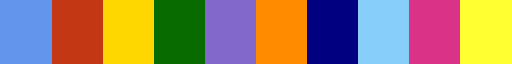

In [2]:
plot_colors = ['Cornflowerblue','#C43714','gold','#076B00','#8368CC','darkorange', 'navy', 'lightskyblue','#DA3287', '#FFFF31']
my_cmap =ListedColormap(sns.color_palette(plot_colors).as_hex())
sns.set_palette(plot_colors)
my_cmap


### 1. Load the dataset

In [5]:
# Load files into a pandas dataframe
df = pd.read_csv('../data/data_bank_account.csv')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [6]:
# inspect train data
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [8]:
# Check for missing values
print('missing values:', df.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.



In [9]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [10]:
# selected_columns = ['country', 'year', 
#                     'bank_account', 'location_type',
#                     'cellphone_access', 'gender_of_respondent', 
#                     'household_size', 'age_of_respondent',
#                     'relationship_with_head', 'marital_status',
#                     'education_level', 'job_type']
# fig,ax = plt.subplots(6,2,figsize=(15,30))
# count = 0
# for item in selected_columns:
#     sns.countplot(data=df, x=item, ax=ax[int(count/2)][count%2]).set(title=item, xlabel='')
#     count += 1

# for i, ax in enumerate(fig.axes):   ## getting all axes of the fig object
#      ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)



In [11]:
df.bank_account.value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

In [12]:
df.country.value_counts(normalize=True)

country
Rwanda      0.371323
Tanzania    0.281415
Kenya       0.257949
Uganda      0.089313
Name: proportion, dtype: float64

In [13]:
df.country.value_counts()

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64

Splitted into bank account yes/no

In [14]:
# selected_columns = ['country', 'location_type',
#                     'cellphone_access', 'gender_of_respondent', 
#                     'relationship_with_head', 'marital_status',
#                     'education_level', 'job_type',
#                     'household_size','age_of_respondent']
# count = 0
# for item in selected_columns:
#     plt.figure()
#     g=sns.catplot(data=df, x=item, hue = 'bank_account', kind='count').set(xlabel='', title = item)
#     ax = g.facet_axis(0,0)
#     ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
#     plt.show();
#     count += 1


## How much people per country? 

In [16]:
# Load files into a pandas dataframe
country_data = pd.read_csv('../data/country_data.csv')
country_data.columns = country_data.columns.str.replace(' ','_')
country_data.columns = country_data.columns.str.lower()

In [17]:
country_data

,country,year,population,gdp_in_billion
0,Kenya,2018,49950000,78
1,Rwanda,2016,11930000,8
2,Tanzania,2017,56270000,47
3,Uganda,2018,41520000,28


In [18]:
df.groupby('country').uniqueid.count()

country
Kenya       6068
Rwanda      8735
Tanzania    6620
Uganda      2101
Name: uniqueid, dtype: int64

In [19]:
# ax2 = sns.barplot(y = country_data['country'], 
#                 x = country_data['population'] 
#                 )
# ax2.set(title = 'Population',
#               xlabel = '',
#               ylabel = '' )

In [20]:
# ax1=sns.barplot(y = df.groupby('country').uniqueid.count().index, 
#                 x = df.groupby('country').uniqueid.count().values 
#                 )
# ax1.set(title = 'Number of respondents',
#               xlabel = '',
#               ylabel = '' )


/var/folders/0r/sbr_hnhj2j39nld23c8vxg9w0000gn/T/ipykernel_94414/1730303567.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=16)
/var/folders/0r/sbr_hnhj2j39nld23c8vxg9w0000gn/T/ipykernel_94414/1730303567.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=16)


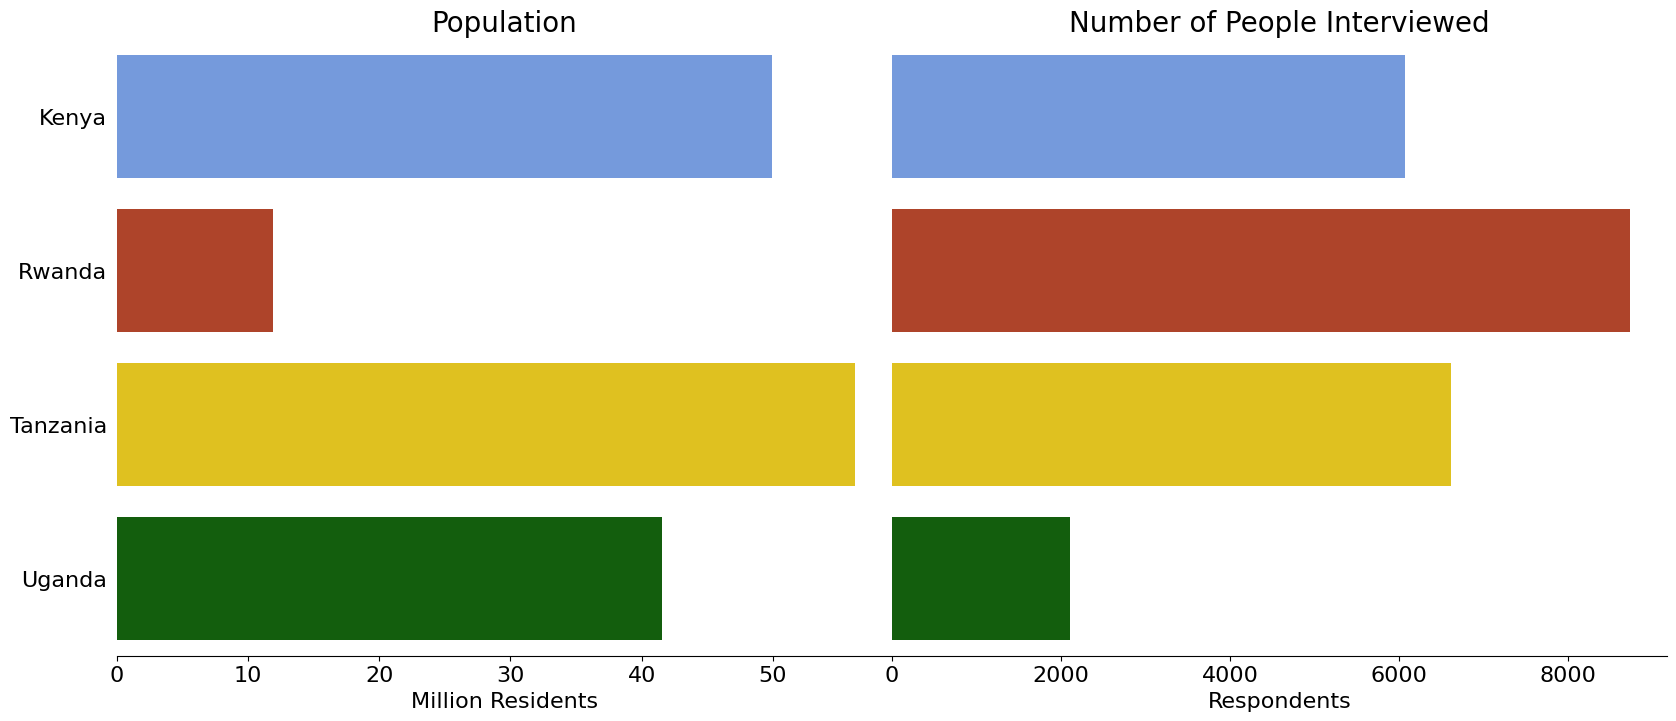

In [22]:
fig,ax = plt.subplots(1,2, sharey=True,figsize=(20,8))
sns.despine(left = True)
ax1 = sns.barplot(x = country_data['population']/1000000,
                  y = country_data['country'],
                  ax=ax[0],
                  )
ax1.set_title('Population', fontsize=20)
ax1.set_xlabel('Million Residents', fontsize=16)
ax1.set_ylabel('', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=16)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=16)
ax1.tick_params(left = False)

ax2 = sns.barplot(x = df.groupby('country').uniqueid.count().values,
                  y = df.groupby('country').uniqueid.count().index,
                  ax=ax[1])
ax2.set_title('Number of People Interviewed', fontsize=20 )
ax2.set_xlabel('Respondents', fontsize=16)
ax2.set_ylabel('', fontsize=16)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=16)
ax2.tick_params(left = False)
fig.subplots_adjust(wspace=0, hspace=0)
picname = '../plots_and_pictures/population_vs_number.png'
plt.savefig(picname, transparent=False)
plt.show()

## Split the data into countries

In [23]:
df.groupby('country').bank_account.value_counts()

country   bank_account
Kenya     No              4547
          Yes             1521
Rwanda    No              7732
          Yes             1003
Tanzania  No              6013
          Yes              607
Uganda    No              1920
          Yes              181
Name: count, dtype: int64

In [24]:
country_list = df.country.unique().tolist()
country_list

['Kenya', 'Rwanda', 'Tanzania', 'Uganda']

In [25]:
#test
df.query('country == "Kenya"').bank_account.value_counts(normalize=True)

bank_account
No     0.749341
Yes    0.250659
Name: proportion, dtype: float64

Bank Account Yes/No Pie Chart

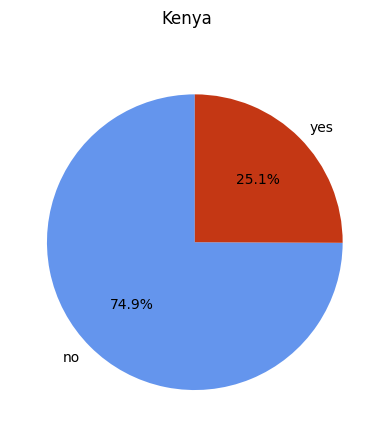

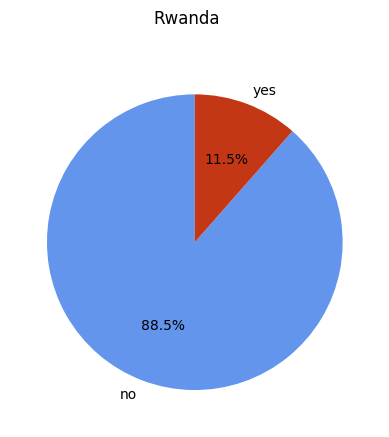

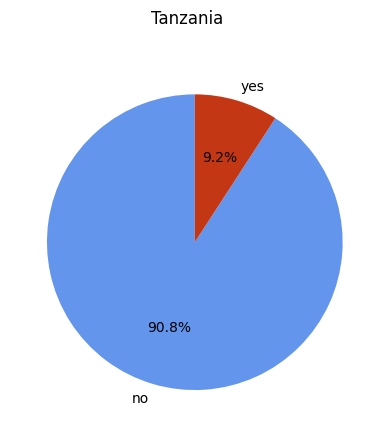

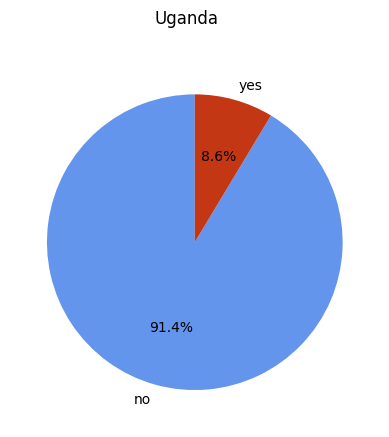

In [27]:
for countr in country_list:
        plt.pie(df.query('country == @countr').bank_account.value_counts(normalize=True),
                labels = ['no', 'yes'],
                autopct='%1.1f%%',
                startangle= 90,
                radius = 1.)
        plt.suptitle(countr)
        picname = '../plots_and_pictures/pie_bank_account_' + countr + '.png'
        plt.savefig(picname, transparent=True)
        #plt.savefig('filename.png', format='png', dpi='600', transparent=True)
        plt.show()

Education Level per Country

In [28]:
#df.education_level.unique()

In [29]:
df['education_level'].replace('Other/Dont know/RTA','Other/Dont know', inplace=True)
df.education_level.unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know'], dtype=object)

In [30]:
# get the education level as list (sorted by value)
edc_lst = df.query('country == "Kenya"').education_level.value_counts(normalize= True).index.tolist()

for countr in country_list:
        g=sns.barplot(y = df.query('country == @countr').education_level.value_counts(normalize=True).index, 
                x = df.query('country == @countr').education_level.value_counts(normalize=True).values*100
                )
        g.set(title = countr,
              xlabel = '%',
              ylabel = '')
        plt.show();

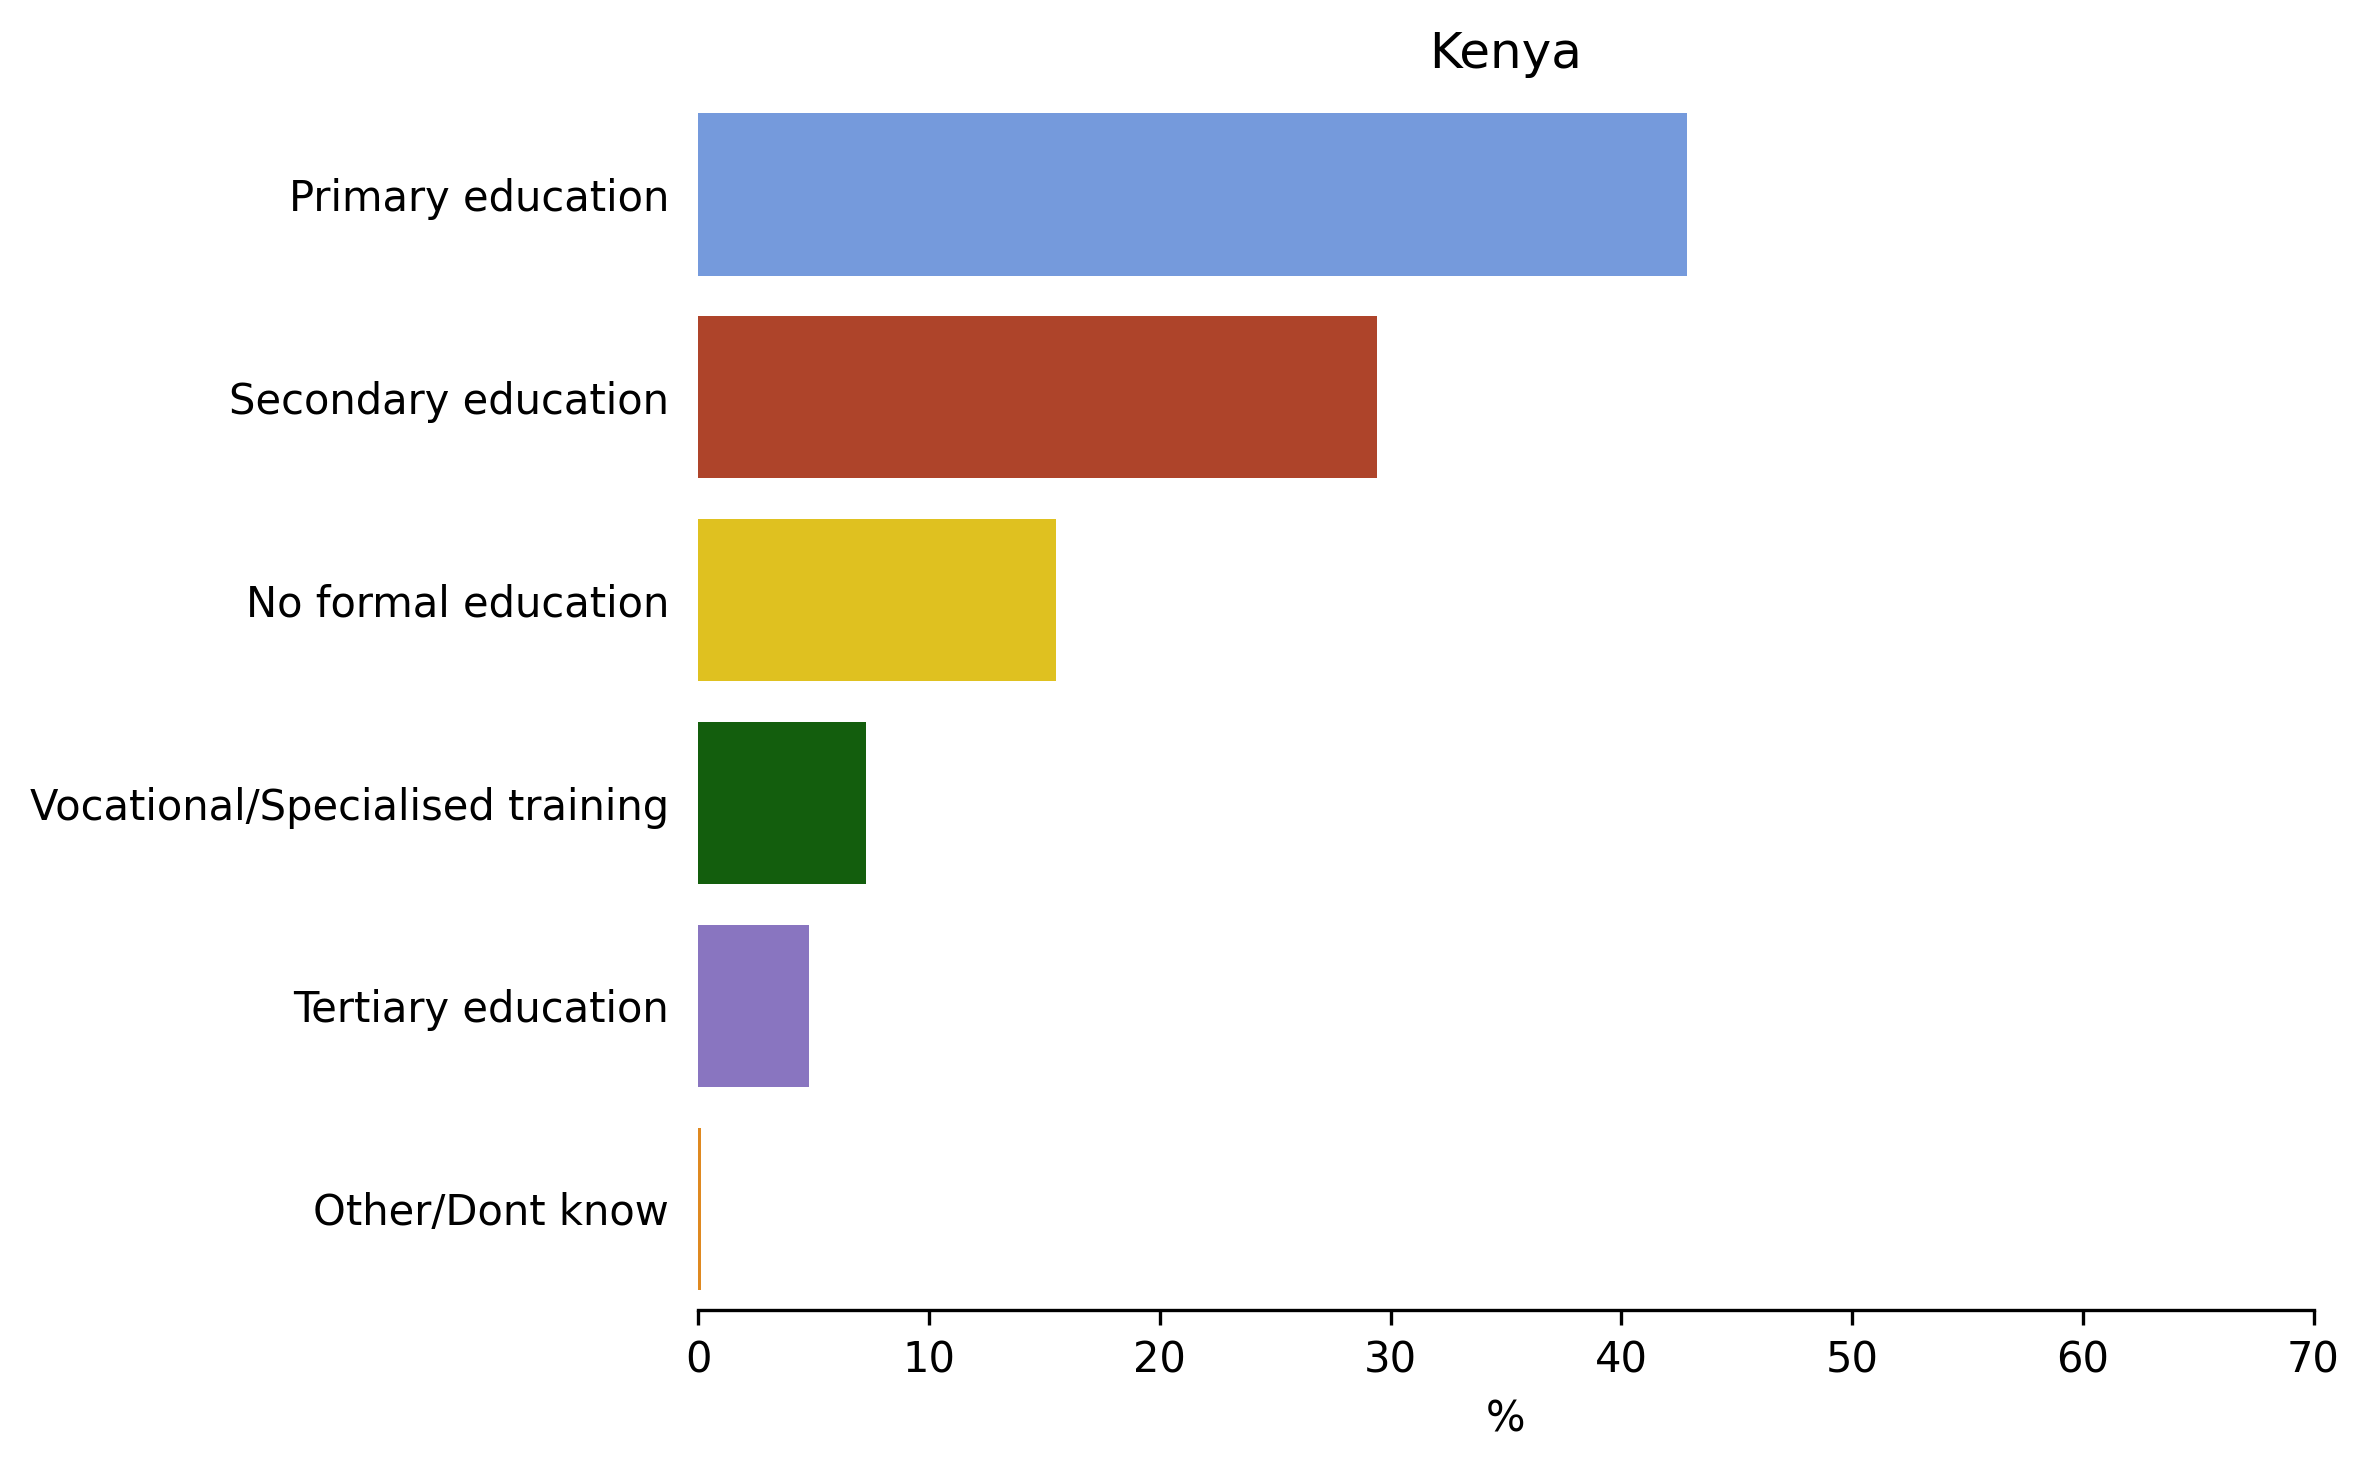

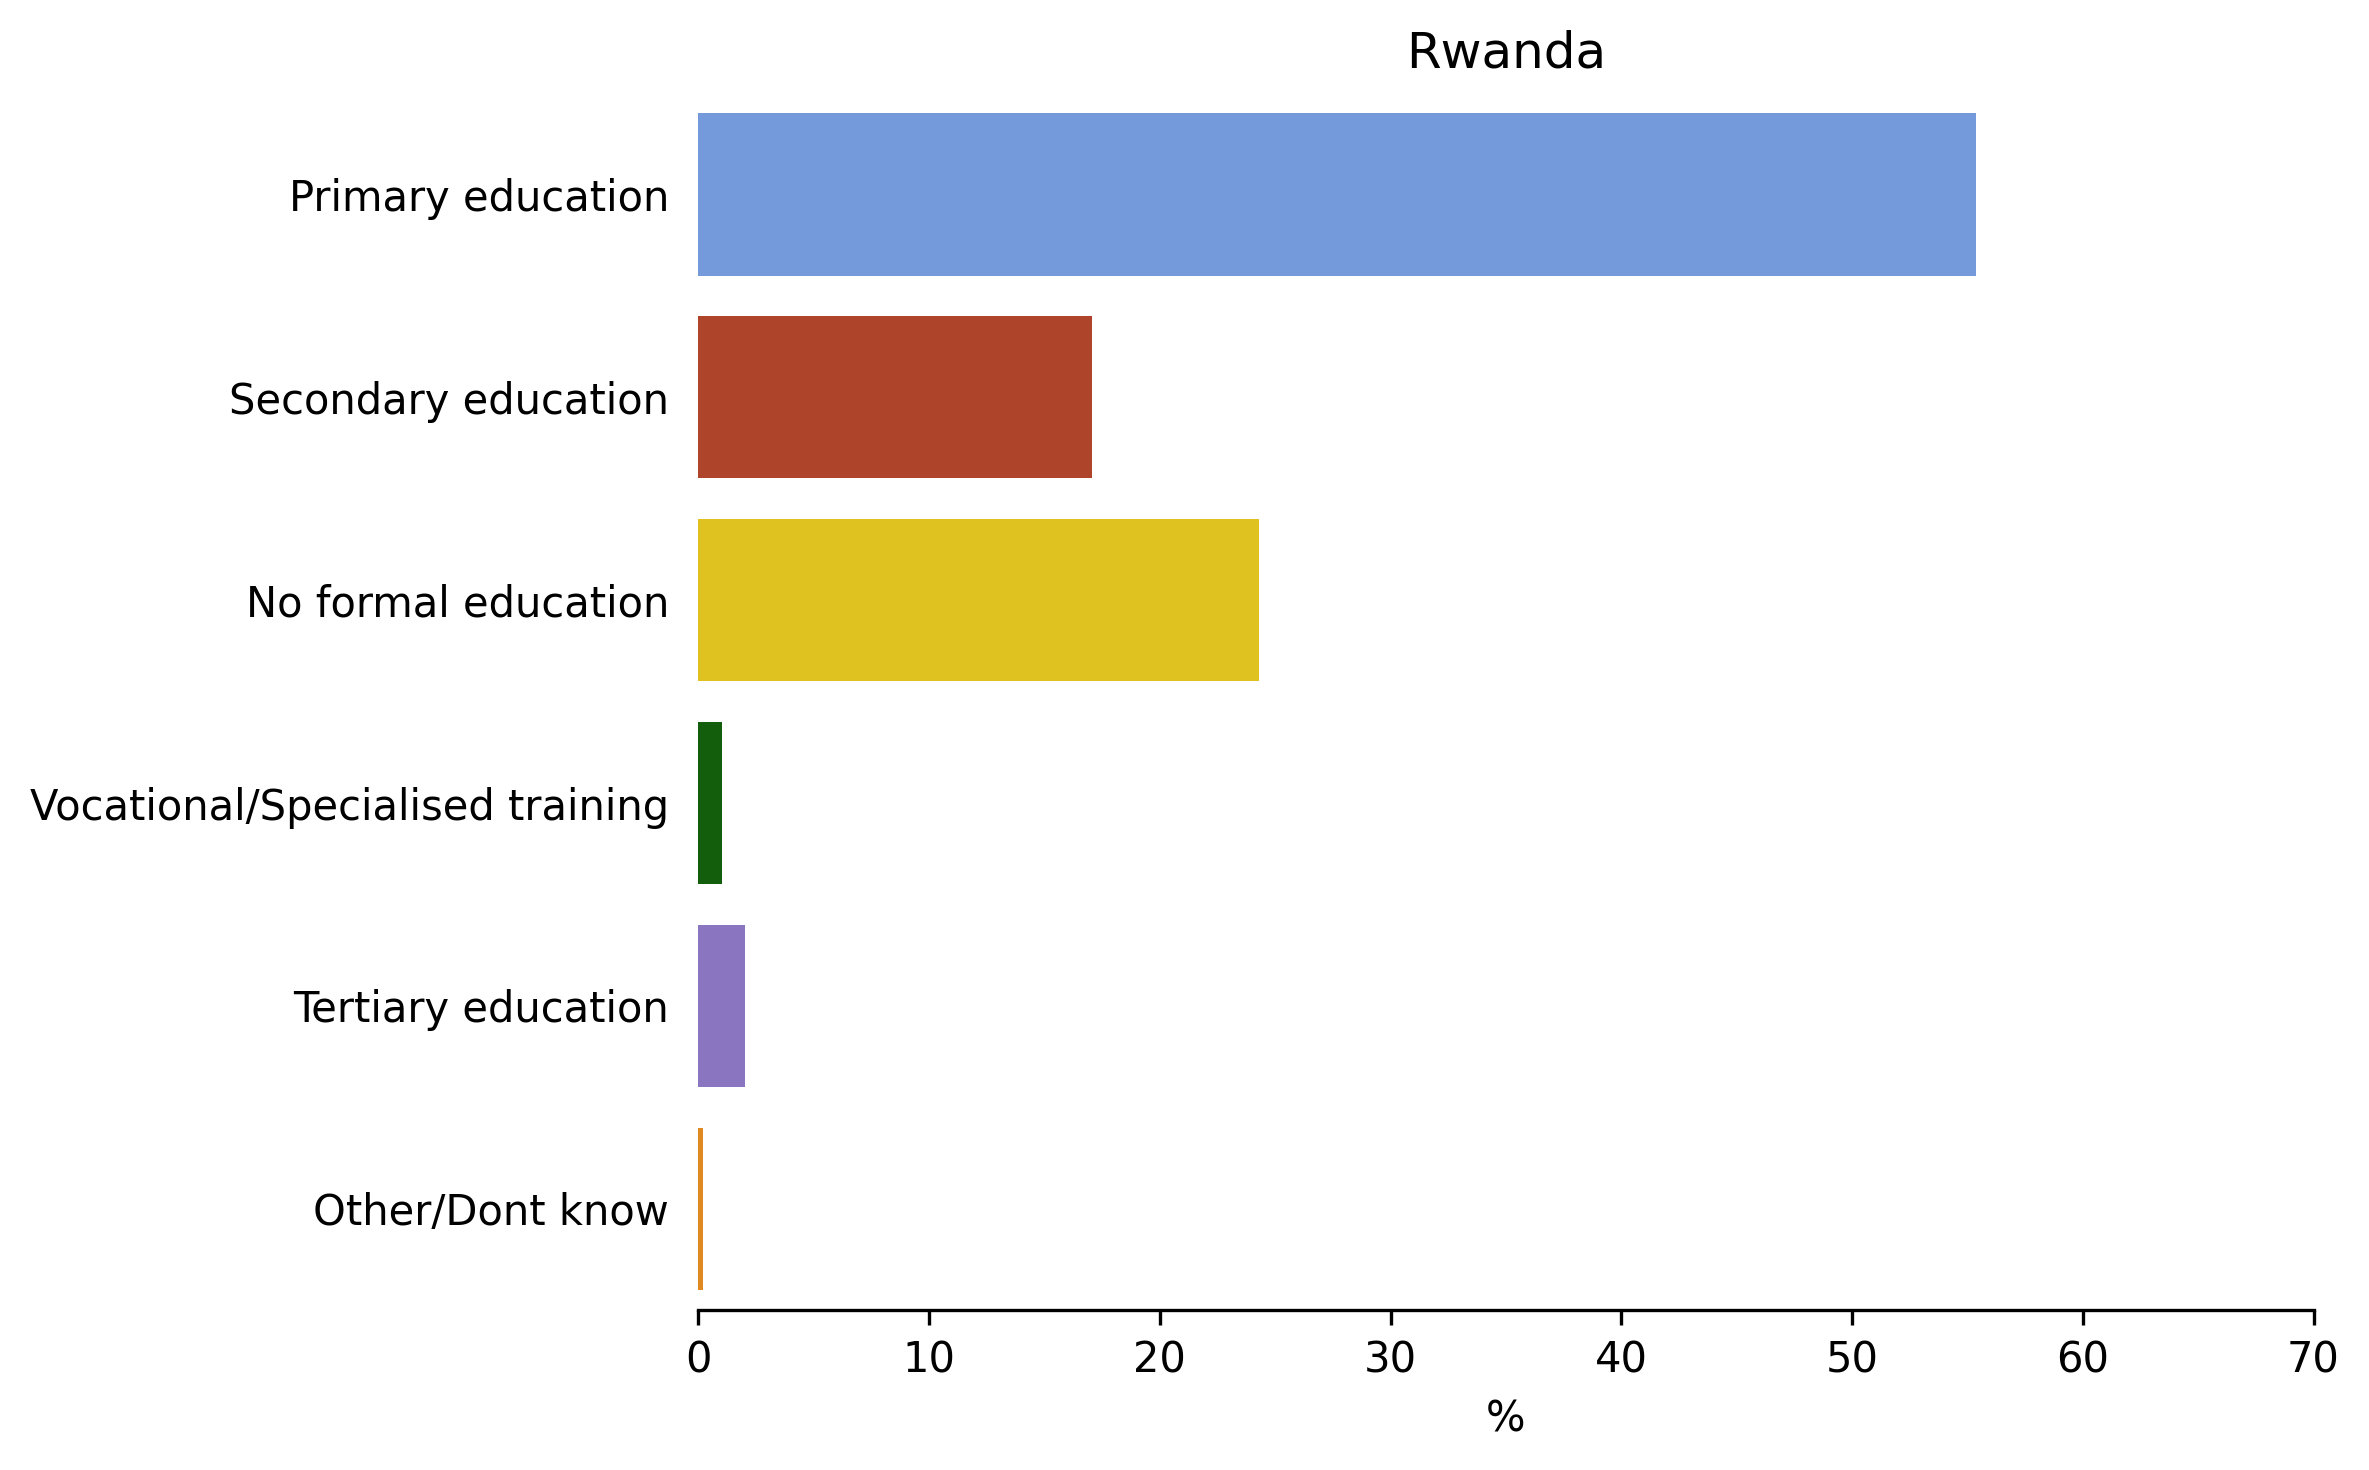

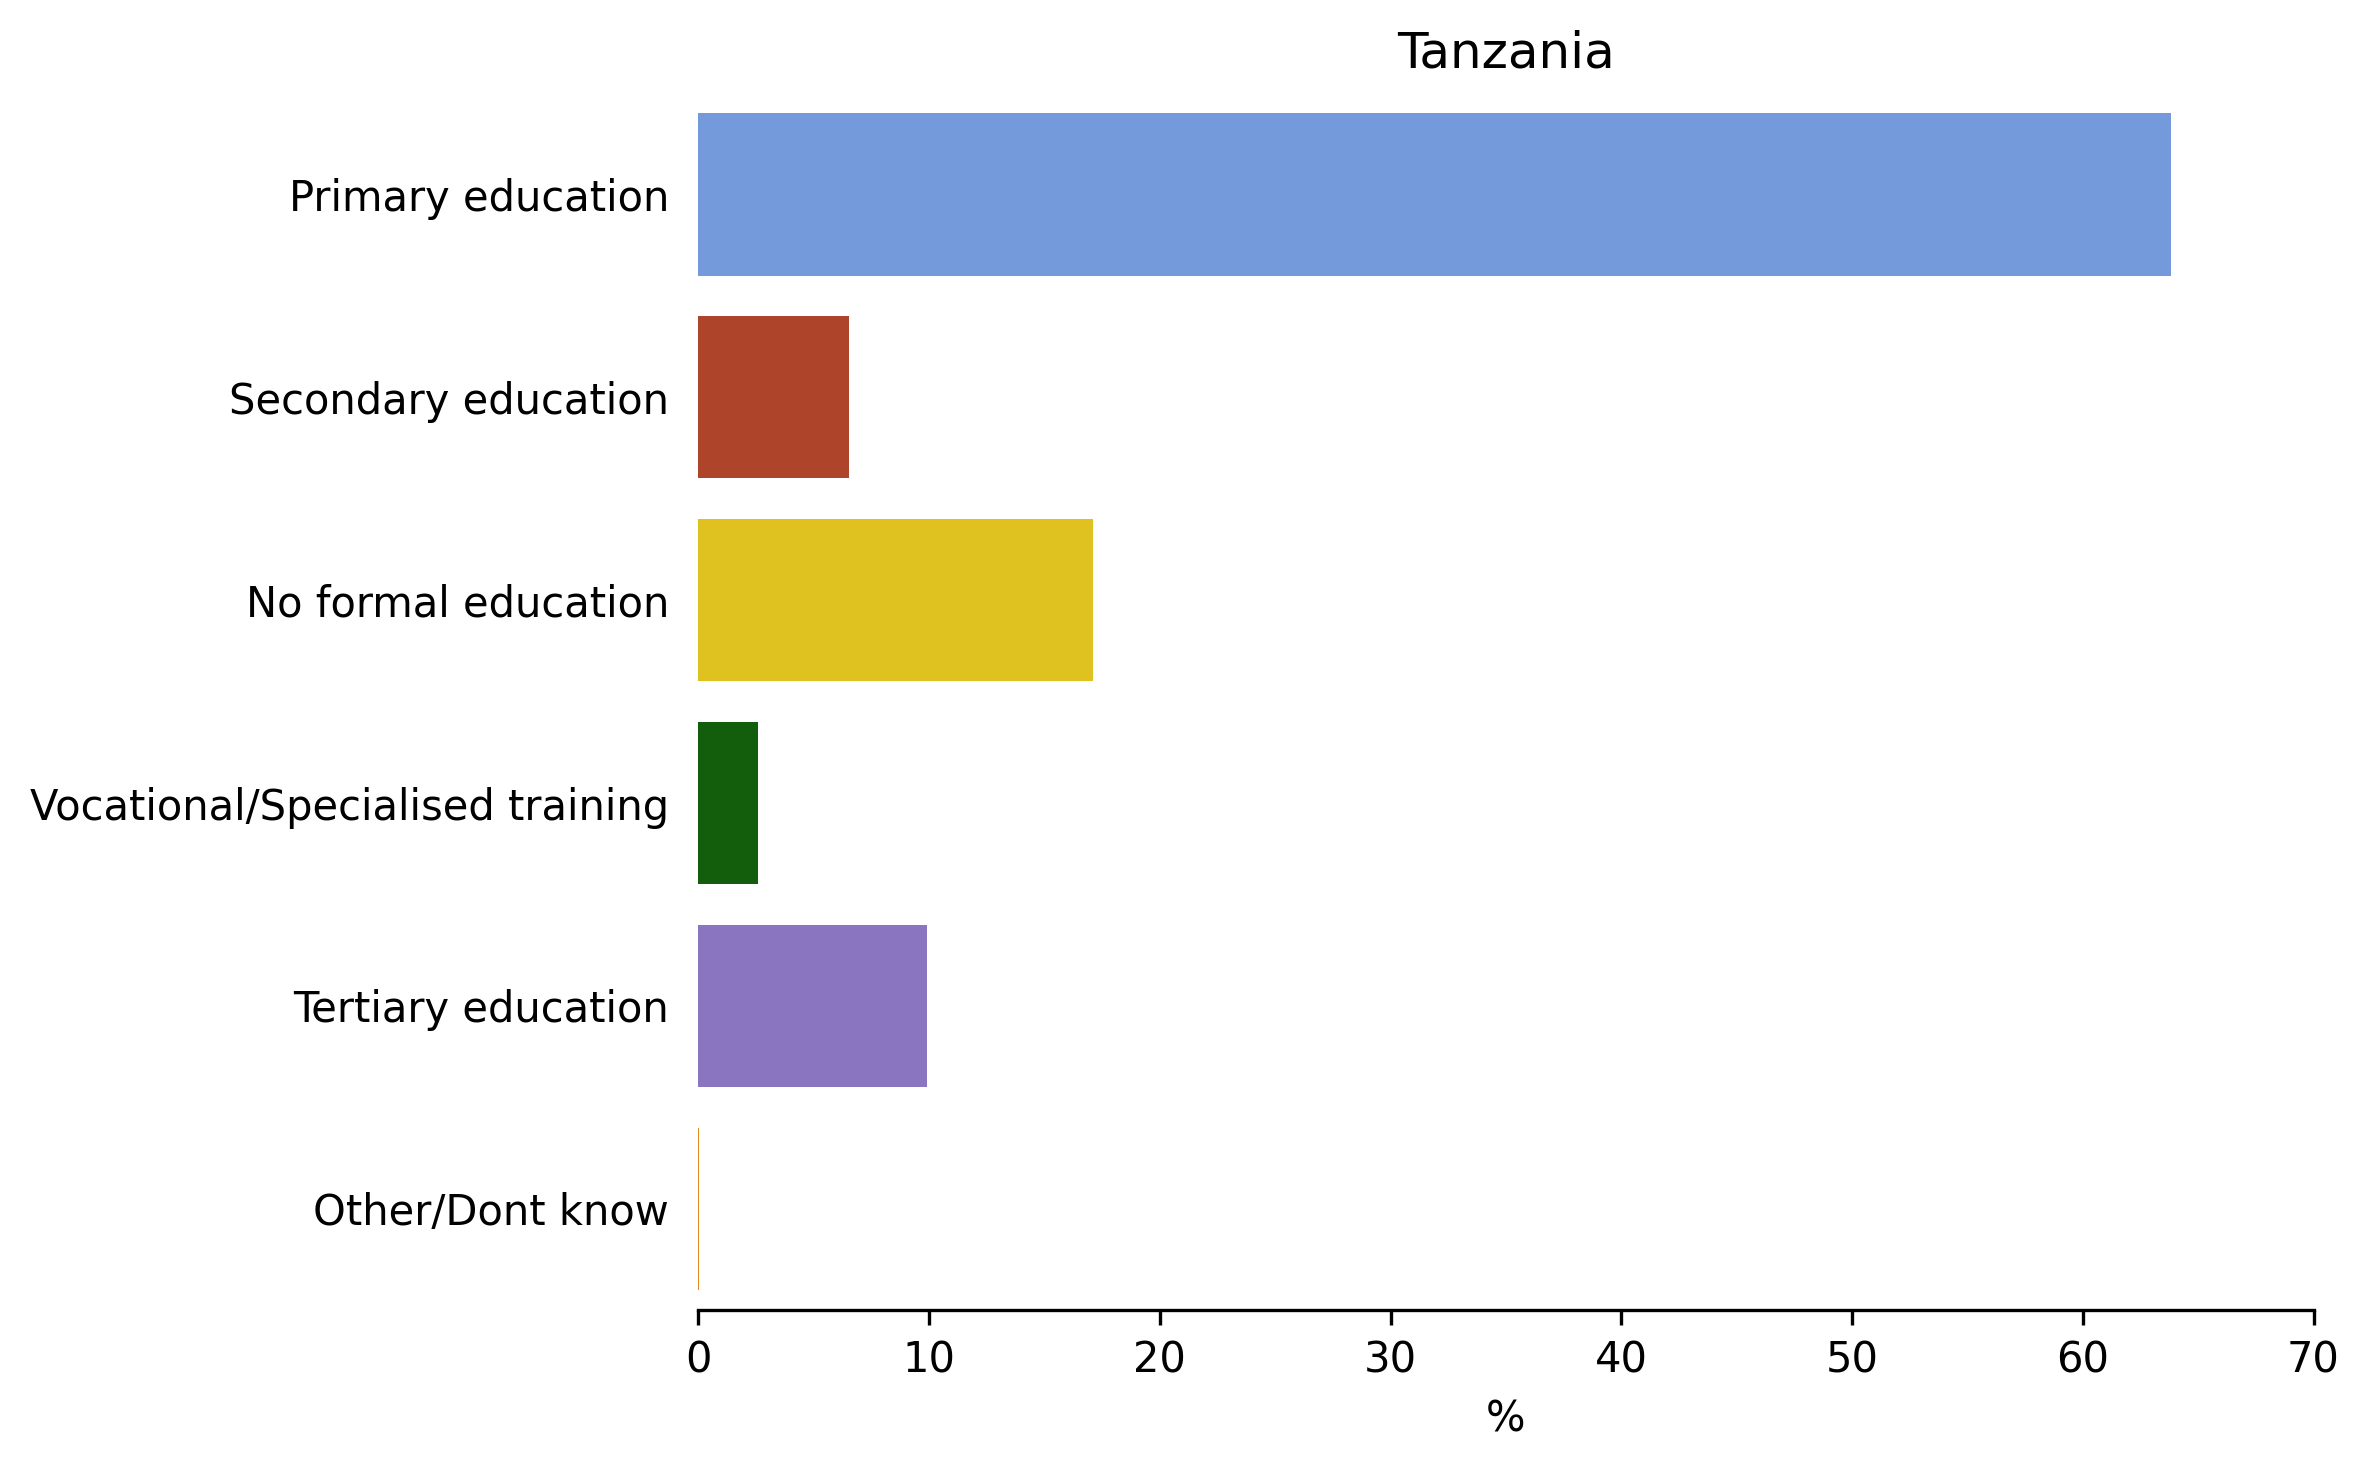

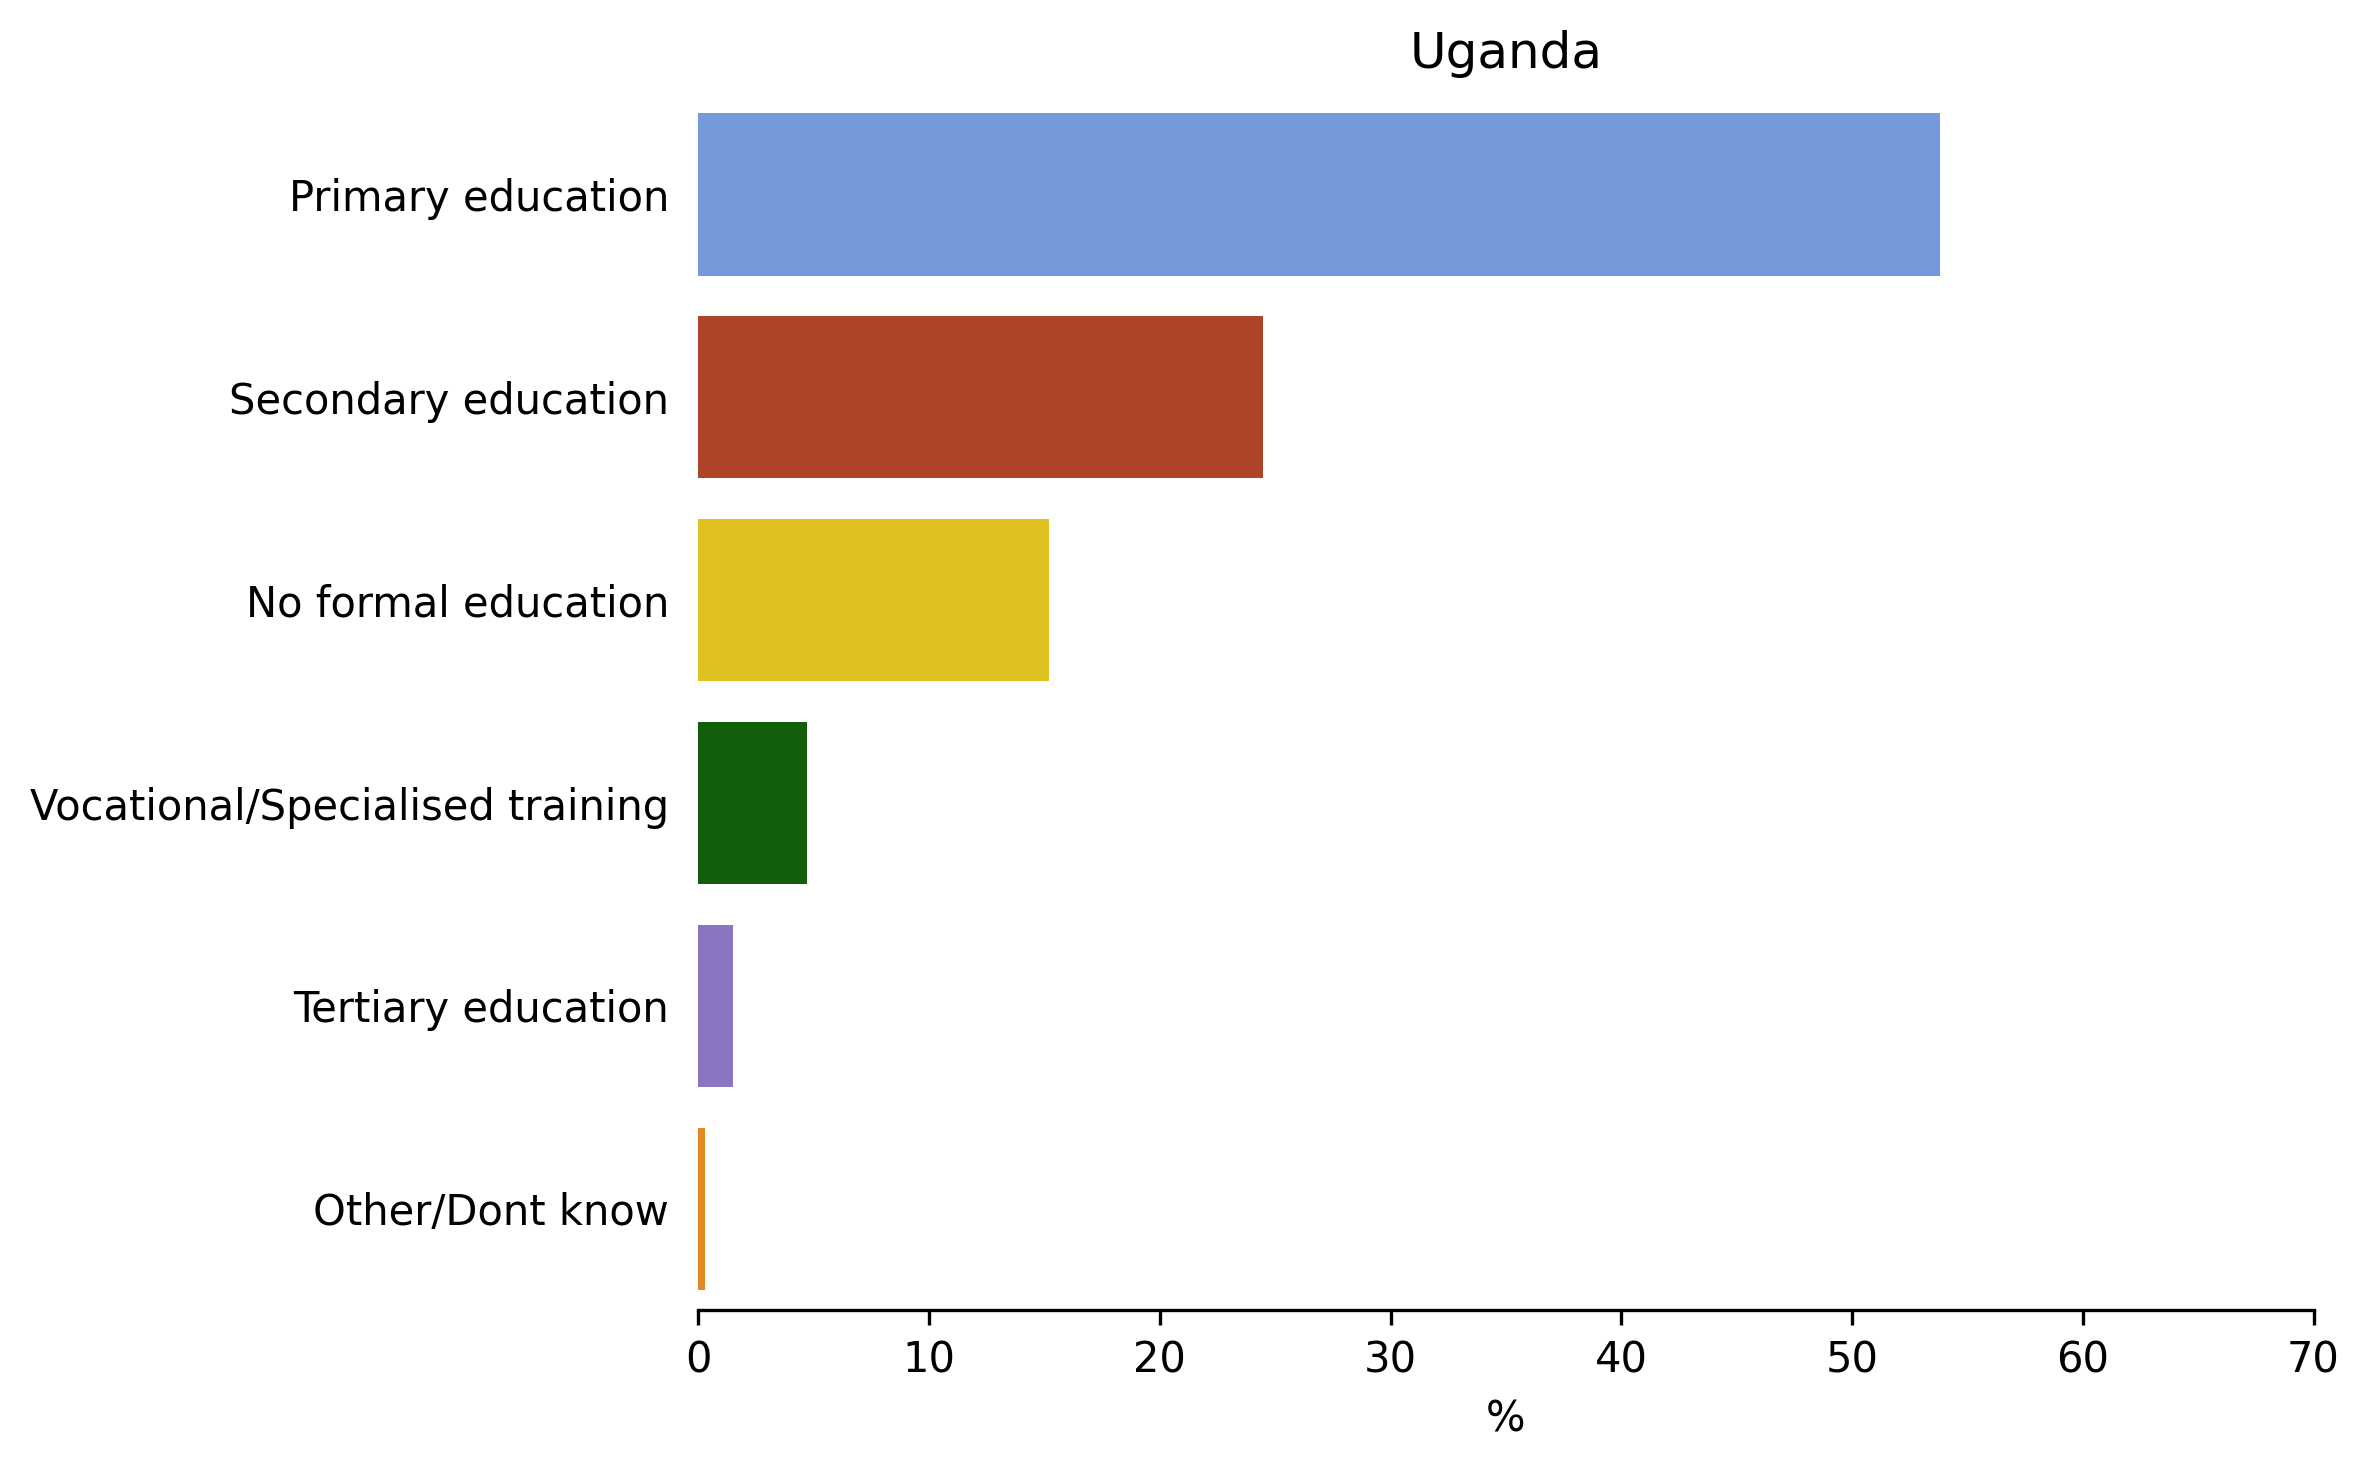

In [32]:
for countr in country_list:
        fig = plt.figure(figsize=(8,5), dpi= 300)
        g=sns.barplot(y = df.query('country == @countr').education_level.value_counts(normalize=True)[edc_lst].index, 
                x = df.query('country == @countr').education_level.value_counts(normalize=True)[edc_lst].values * 100
                )
        g.set(title = countr,
              xlabel = '%',
              ylabel = '')
        g.tick_params(left = False)
        g.set_xlim(0,70)
        sns.despine(left = True)
        picname = '../plots_and_pictures/bar_educ_level_' + countr + '.png'
        plt.tight_layout()
        plt.savefig(picname, transparent=False, dpi=fig.dpi)
        plt.show();

for countr in country_list:
        plt.barh(df.query('country == @countr').education_level.value_counts(normalize=True).index, 
                df.query('country == @countr').education_level.value_counts(normalize=True).values,
                #labels = df.query('country == @countr').education_level.value_counts(normalize= True).index.tolist(),
                #colors = colors,
                #autopct='%1.1f%%'
                )
        plt.suptitle(countr)
        plt.show()

Bank account rate per education level

In [33]:
edu_join = pd.concat([df.groupby('education_level').education_level.count(),
                            df.query('bank_account == "Yes"').groupby('education_level').education_level.count()],
                            axis=1)
edu_join.fillna(0, inplace=True)
edu_join

,education_level,education_level
education_level,,
No formal education,4515,176
Other/Dont know,35,11
Primary education,12791,1093
Secondary education,4223,983
Tertiary education,1157,591
Vocational/Specialised training,803,458


In [34]:
edu_join['account_rate'] = (edu_join.iloc[:,1]/edu_join.iloc[:,0])*100
edu_join

,education_level,education_level,account_rate
education_level,,,
No formal education,4515,176,3.898117
Other/Dont know,35,11,31.428571
Primary education,12791,1093,8.545071
Secondary education,4223,983,23.277291
Tertiary education,1157,591,51.080380
Vocational/Specialised training,803,458,57.036115


In [35]:
# fig = plt.figure(figsize=(10, 8), dpi=120)
# g=sns.barplot(y = edu_join.index,
#             x = edu_join.account_rate)
# g.set_xticklabels(g.get_xticklabels(), rotation = 90)
# sns.despine(left = True)
# plt.savefig('plots_and_pictures/edu_level_bank_rate', transparent=False, dpi=fig.dpi)

/var/folders/0r/sbr_hnhj2j39nld23c8vxg9w0000gn/T/ipykernel_94414/1762756705.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=16)
/var/folders/0r/sbr_hnhj2j39nld23c8vxg9w0000gn/T/ipykernel_94414/1762756705.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(g.get_xticklabels(), rotation = 0)
/var/folders/0r/sbr_hnhj2j39nld23c8vxg9w0000gn/T/ipykernel_94414/1762756705.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=16)


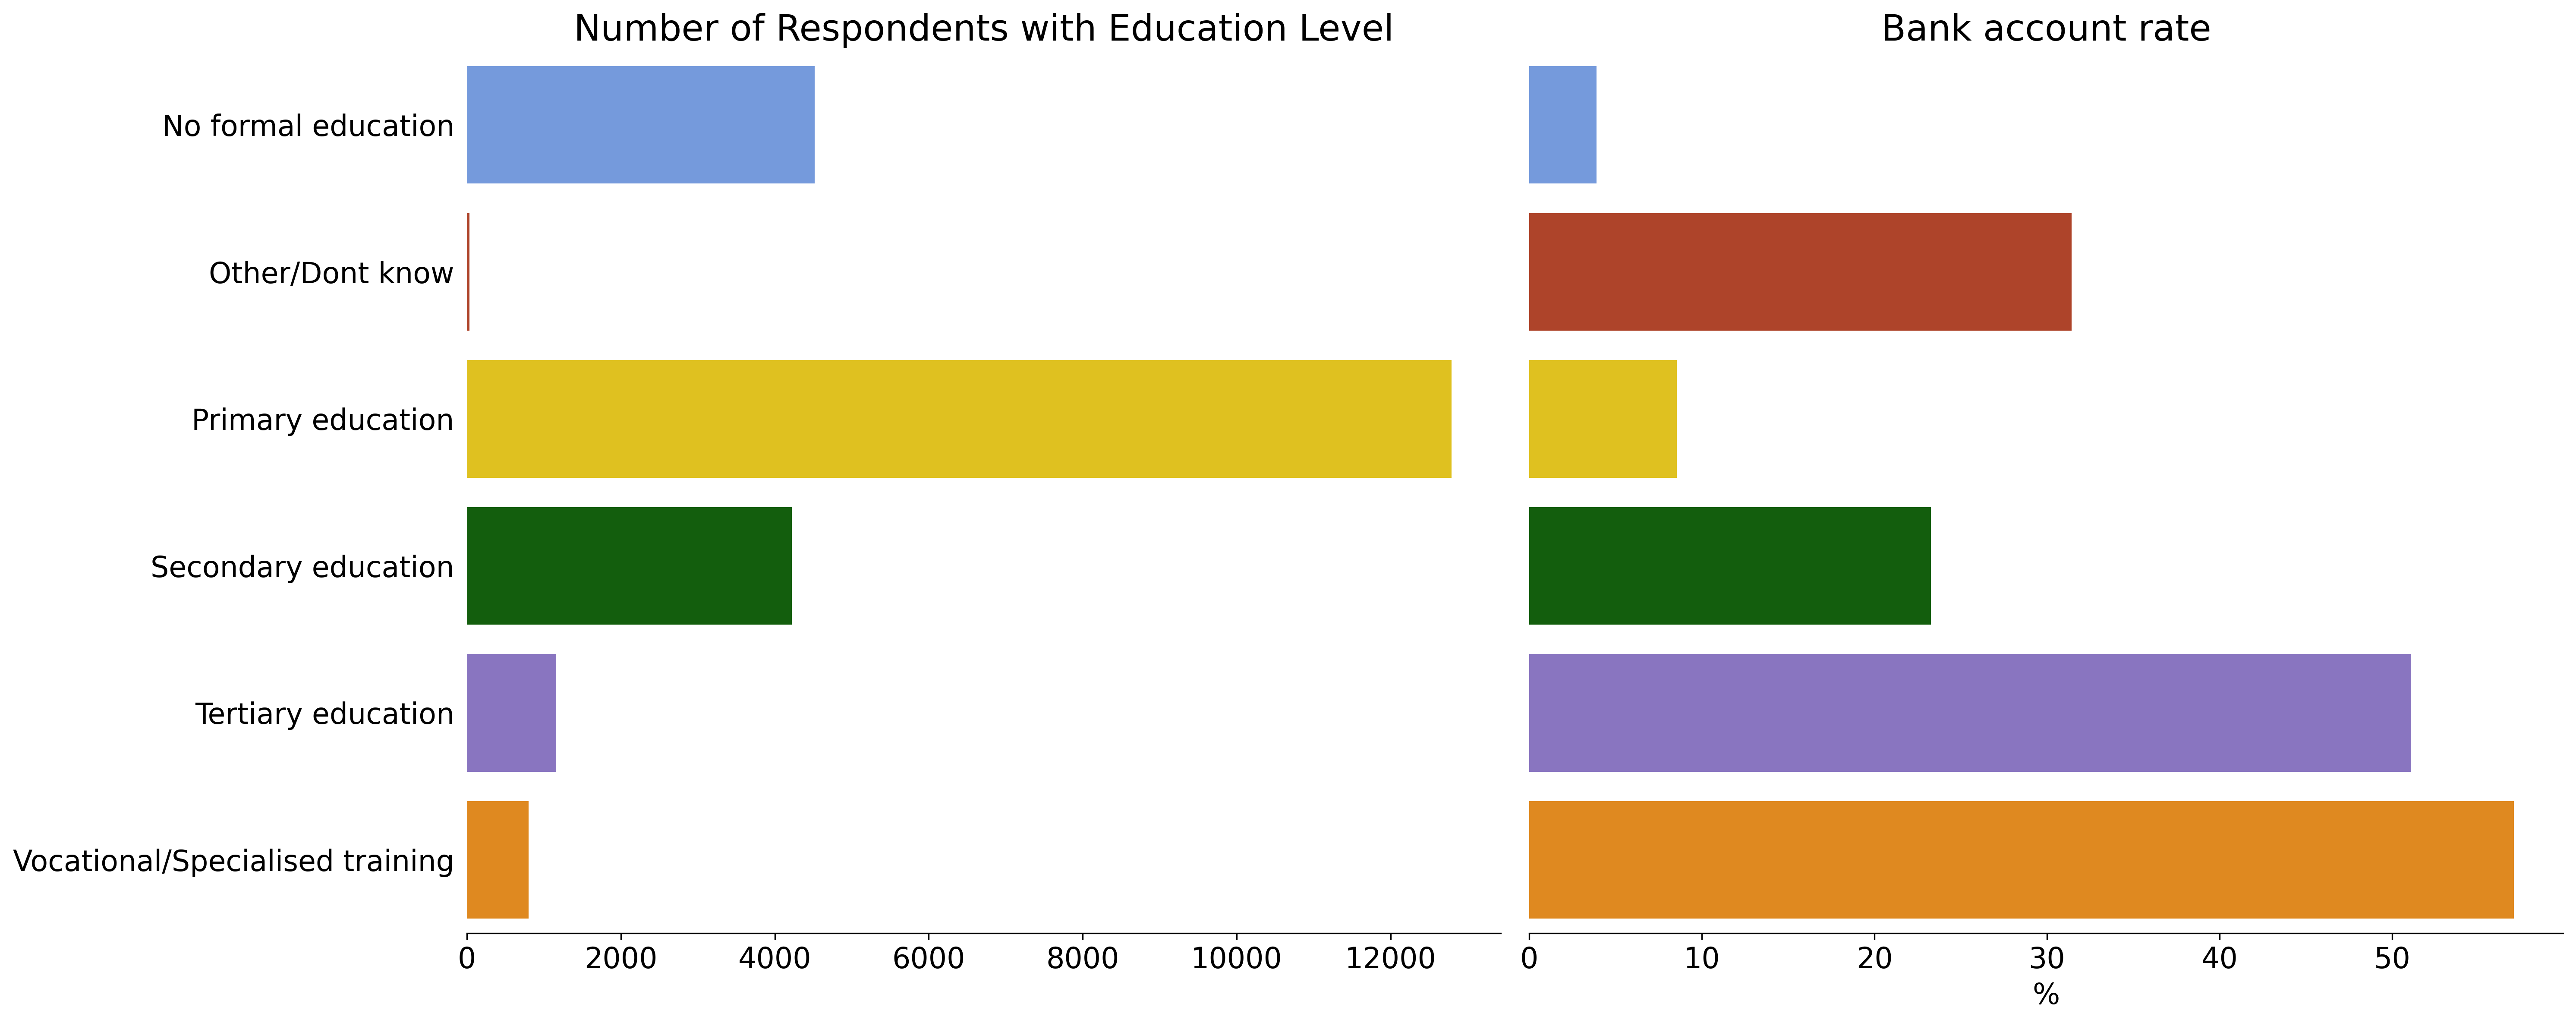

In [37]:
fig,ax = plt.subplots(1,2, sharey=True,figsize=(20,8), dpi=300)
#cmap = matplotlib.colors.ListedColormap(plot_colors)
ax1 =sns.barplot(y = edu_join.index,
            x = edu_join.iloc[:,0],
            ax=ax[0]
            )
ax1.set_title('Number of Respondents with Education Level', fontsize=20)
ax1.set(xlabel = '',
        ylabel = '' )

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=16)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=16)
ax1.tick_params(left = False)

ax2 =sns.barplot(y = edu_join.index,
            x = edu_join.account_rate,
            ax=ax[1]
            )
ax2.set_xticklabels(g.get_xticklabels(), rotation = 0)
ax2.set_title('Bank account rate', fontsize=20 )
ax2.set_xlabel('%', fontsize = 16)
ax2.set_ylabel('', fontsize = 16)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=16)
ax2.tick_params(left = False)
fig.subplots_adjust(wspace=0, hspace=0)
sns.despine(left = True)
plt.tight_layout()
plt.savefig('../plots_and_pictures/edu_level_bank_rate', transparent=False, dpi=fig.dpi)
plt.show()

## Job Type per Country

In [38]:
# test 
df.groupby('country').job_type.value_counts(normalize= True)

country   job_type                    
Kenya     Farming and Fishing             0.265162
          Informally employed             0.233850
          Remittance Dependent            0.195781
          Self employed                   0.157218
          Formally employed Private       0.068556
          Formally employed Government    0.042848
          Other Income                    0.025379
          Government Dependent            0.010712
          Dont Know/Refuse to answer      0.000494
Rwanda    Farming and Fishing             0.438695
          Informally employed             0.329479
          Remittance Dependent            0.075787
          Self employed                   0.069262
          Other Income                    0.036978
          Formally employed Private       0.018432
          Formally employed Government    0.014539
          Government Dependent            0.010418
          Dont Know/Refuse to answer      0.006411
Tanzania  Self employed                   0

In [39]:
# get the education level as list (sorted by value)
#job_lst = df.query('country == "Kenya"').job_type.value_counts(normalize= True).index.tolist()

In [40]:
# for countr in country_list:
#         g=sns.barplot(y = df.query('country == @countr').job_type.value_counts(normalize=True)[job_lst].index, 
#                 x = df.query('country == @countr').job_type.value_counts(normalize=True)[job_lst].values
#                 )
#         g.set(title = countr,
#               ylabel = '')

#         plt.show();

The job types are not the same in all countries. This makes it difficult to present them in the same way.   
I will try to do it in a different way:

In [41]:
job_dummies = pd.get_dummies(df.job_type, prefix='job')
job_dummies.columns = job_dummies.columns.str.replace(' ','_')
job_dummies.columns = job_dummies.columns.str.replace('/','_or_')
job_dummies.columns = job_dummies.columns.str.lower()
# change bool to int
job_dummies[job_dummies.columns.to_list()] = job_dummies[job_dummies.columns.to_list()].astype(int)
job_dummies.head(10)

,job_dont_know_or_refuse_to_answer,job_farming_and_fishing,job_formally_employed_government,job_formally_employed_private,job_government_dependent,job_informally_employed,job_no_income,job_other_income,job_remittance_dependent,job_self_employed
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1
7,0,0,1,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0


In [42]:
job_dummies.sum()

job_dont_know_or_refuse_to_answer     126
job_farming_and_fishing              5441
job_formally_employed_government      387
job_formally_employed_private        1055
job_government_dependent              247
job_informally_employed              5597
job_no_income                         627
job_other_income                     1080
job_remittance_dependent             2527
job_self_employed                    6437
dtype: int64

In [43]:
#loaction_df = location_dummies.join(df['country'])
#loaction_df.head() 
#loaction_df.groupby('country').sum()

job_sum = job_dummies.join(df['country']).groupby('country').sum()
job_sum = job_sum.transpose()
job_sum

country,Kenya,Rwanda,Tanzania,Uganda
job_dont_know_or_refuse_to_answer,3,56,0,67
job_farming_and_fishing,1609,3832,0,0
job_formally_employed_government,260,127,0,0
job_formally_employed_private,416,161,370,108
job_government_dependent,65,91,84,7
job_informally_employed,1419,2878,1300,0
job_no_income,0,0,380,247
job_other_income,154,323,35,568
job_remittance_dependent,1188,662,677,0
job_self_employed,954,605,3774,1104


Now I have a table with the number ob jobstype per country.

In [44]:
job_sum.index

Index(['job_dont_know_or_refuse_to_answer', 'job_farming_and_fishing',
       'job_formally_employed_government', 'job_formally_employed_private',
       'job_government_dependent', 'job_informally_employed', 'job_no_income',
       'job_other_income', 'job_remittance_dependent', 'job_self_employed'],
      dtype='object')

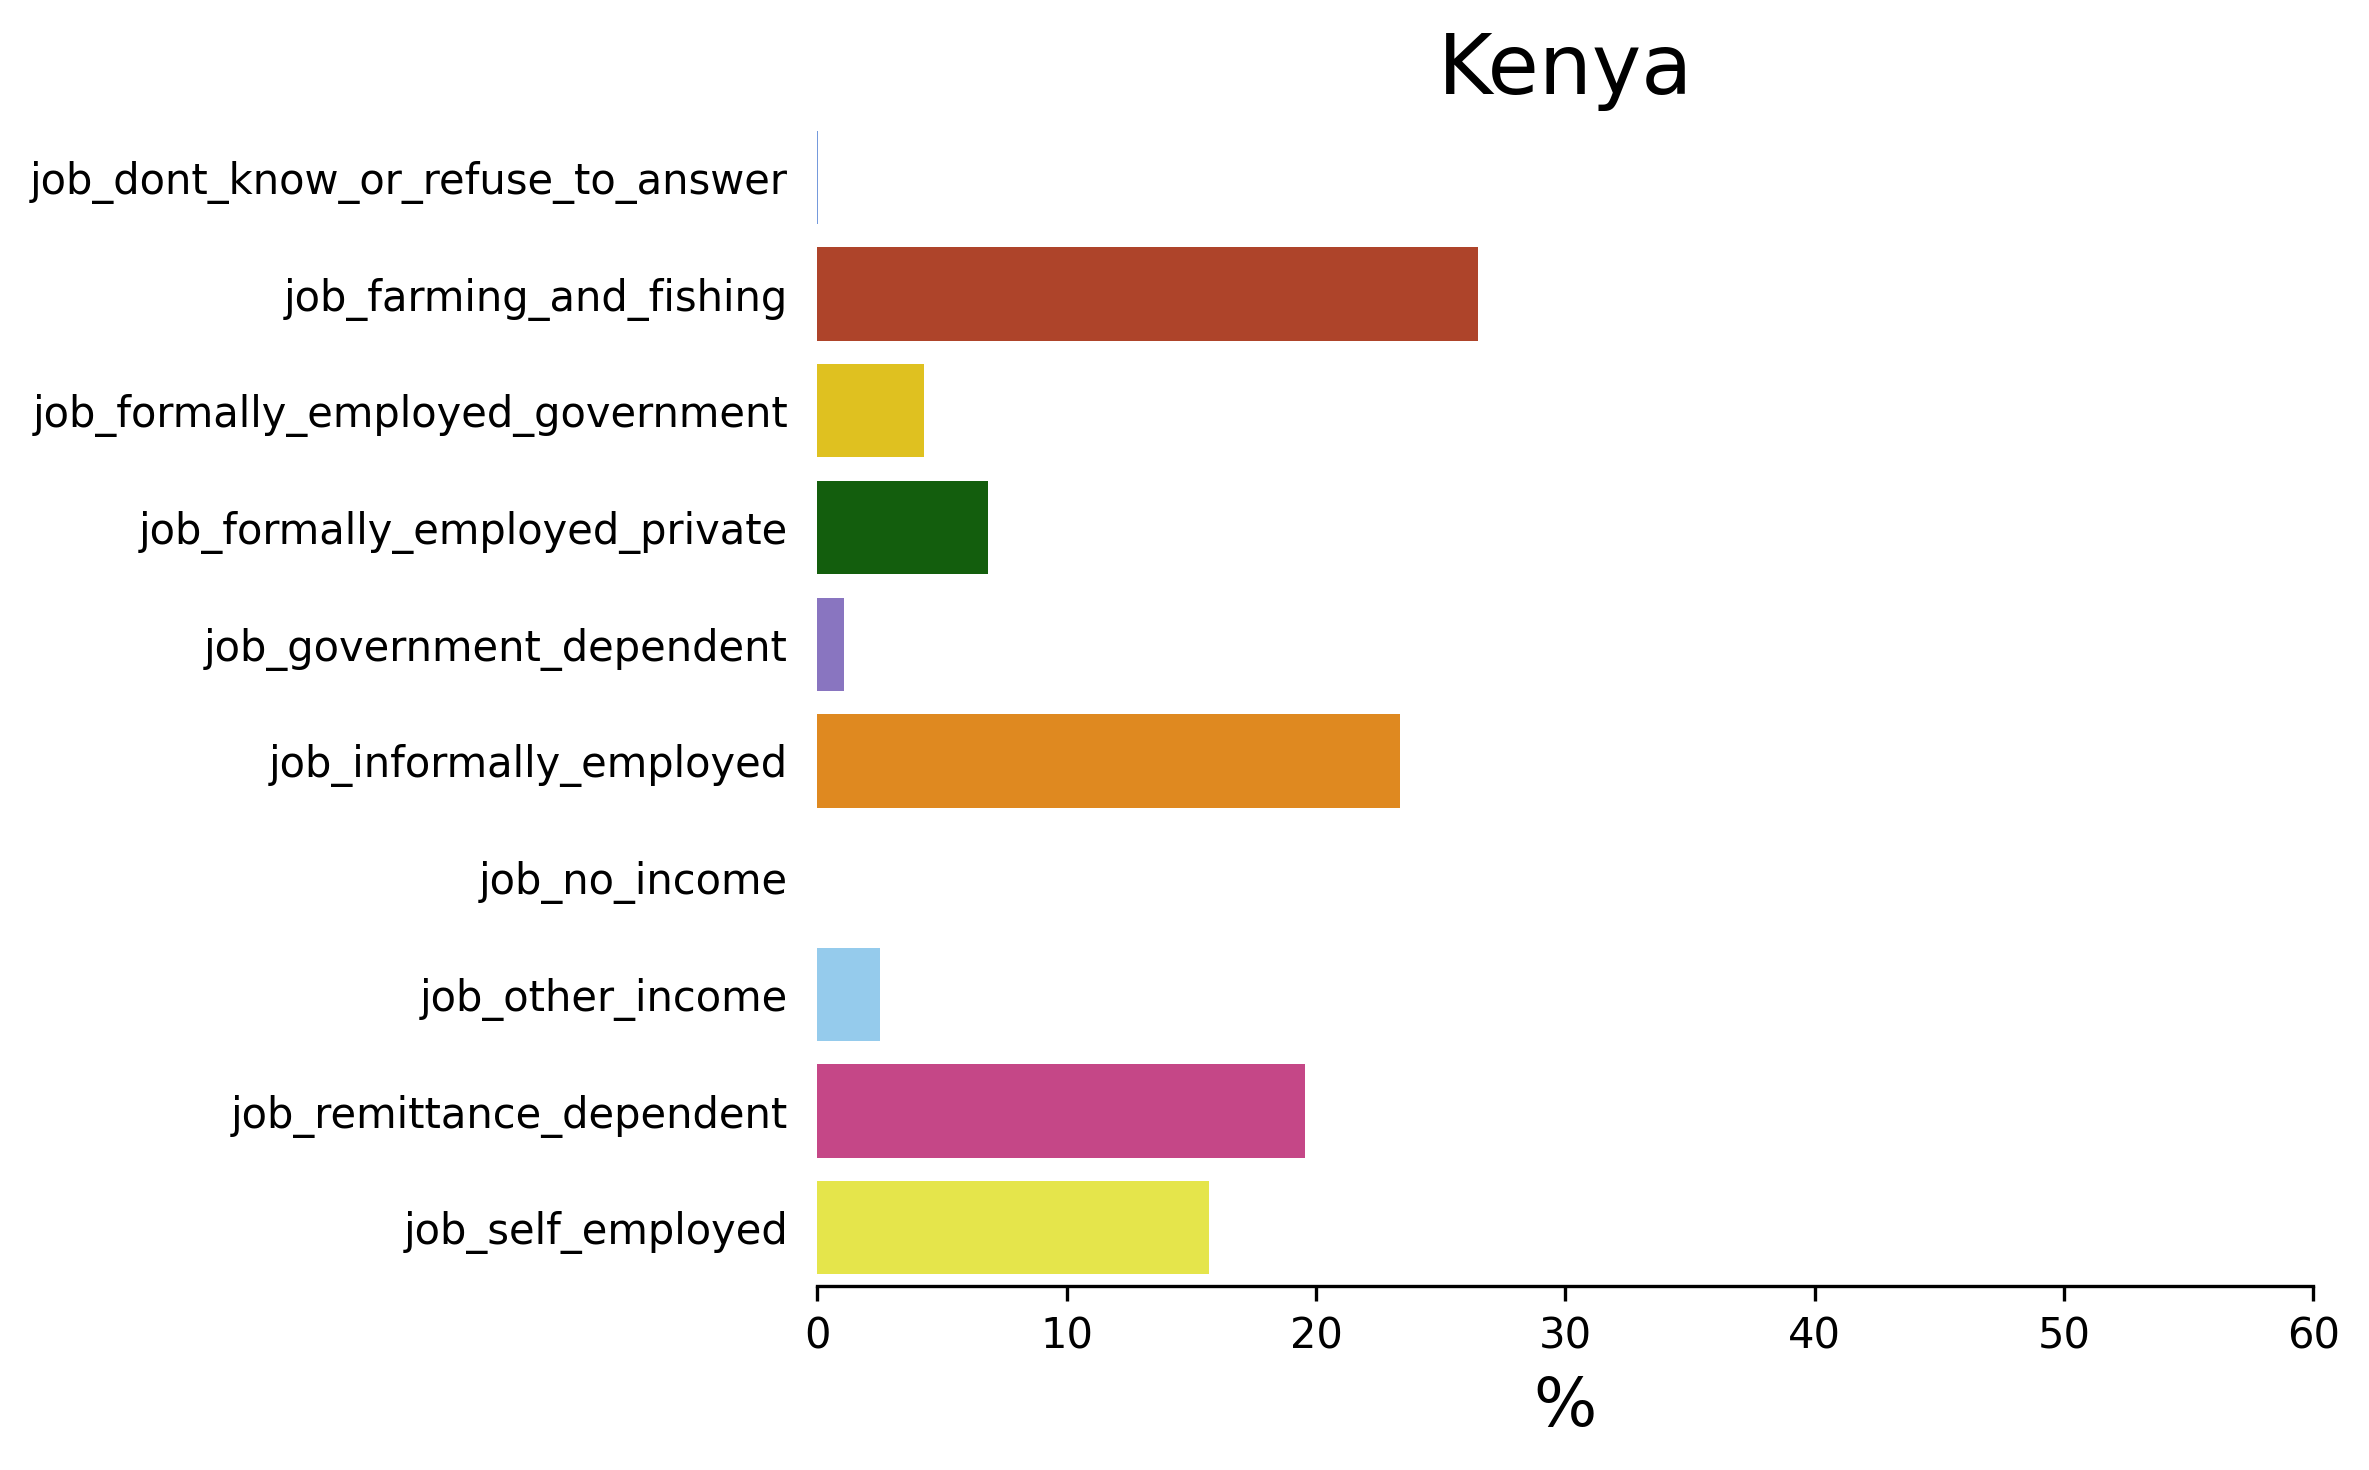

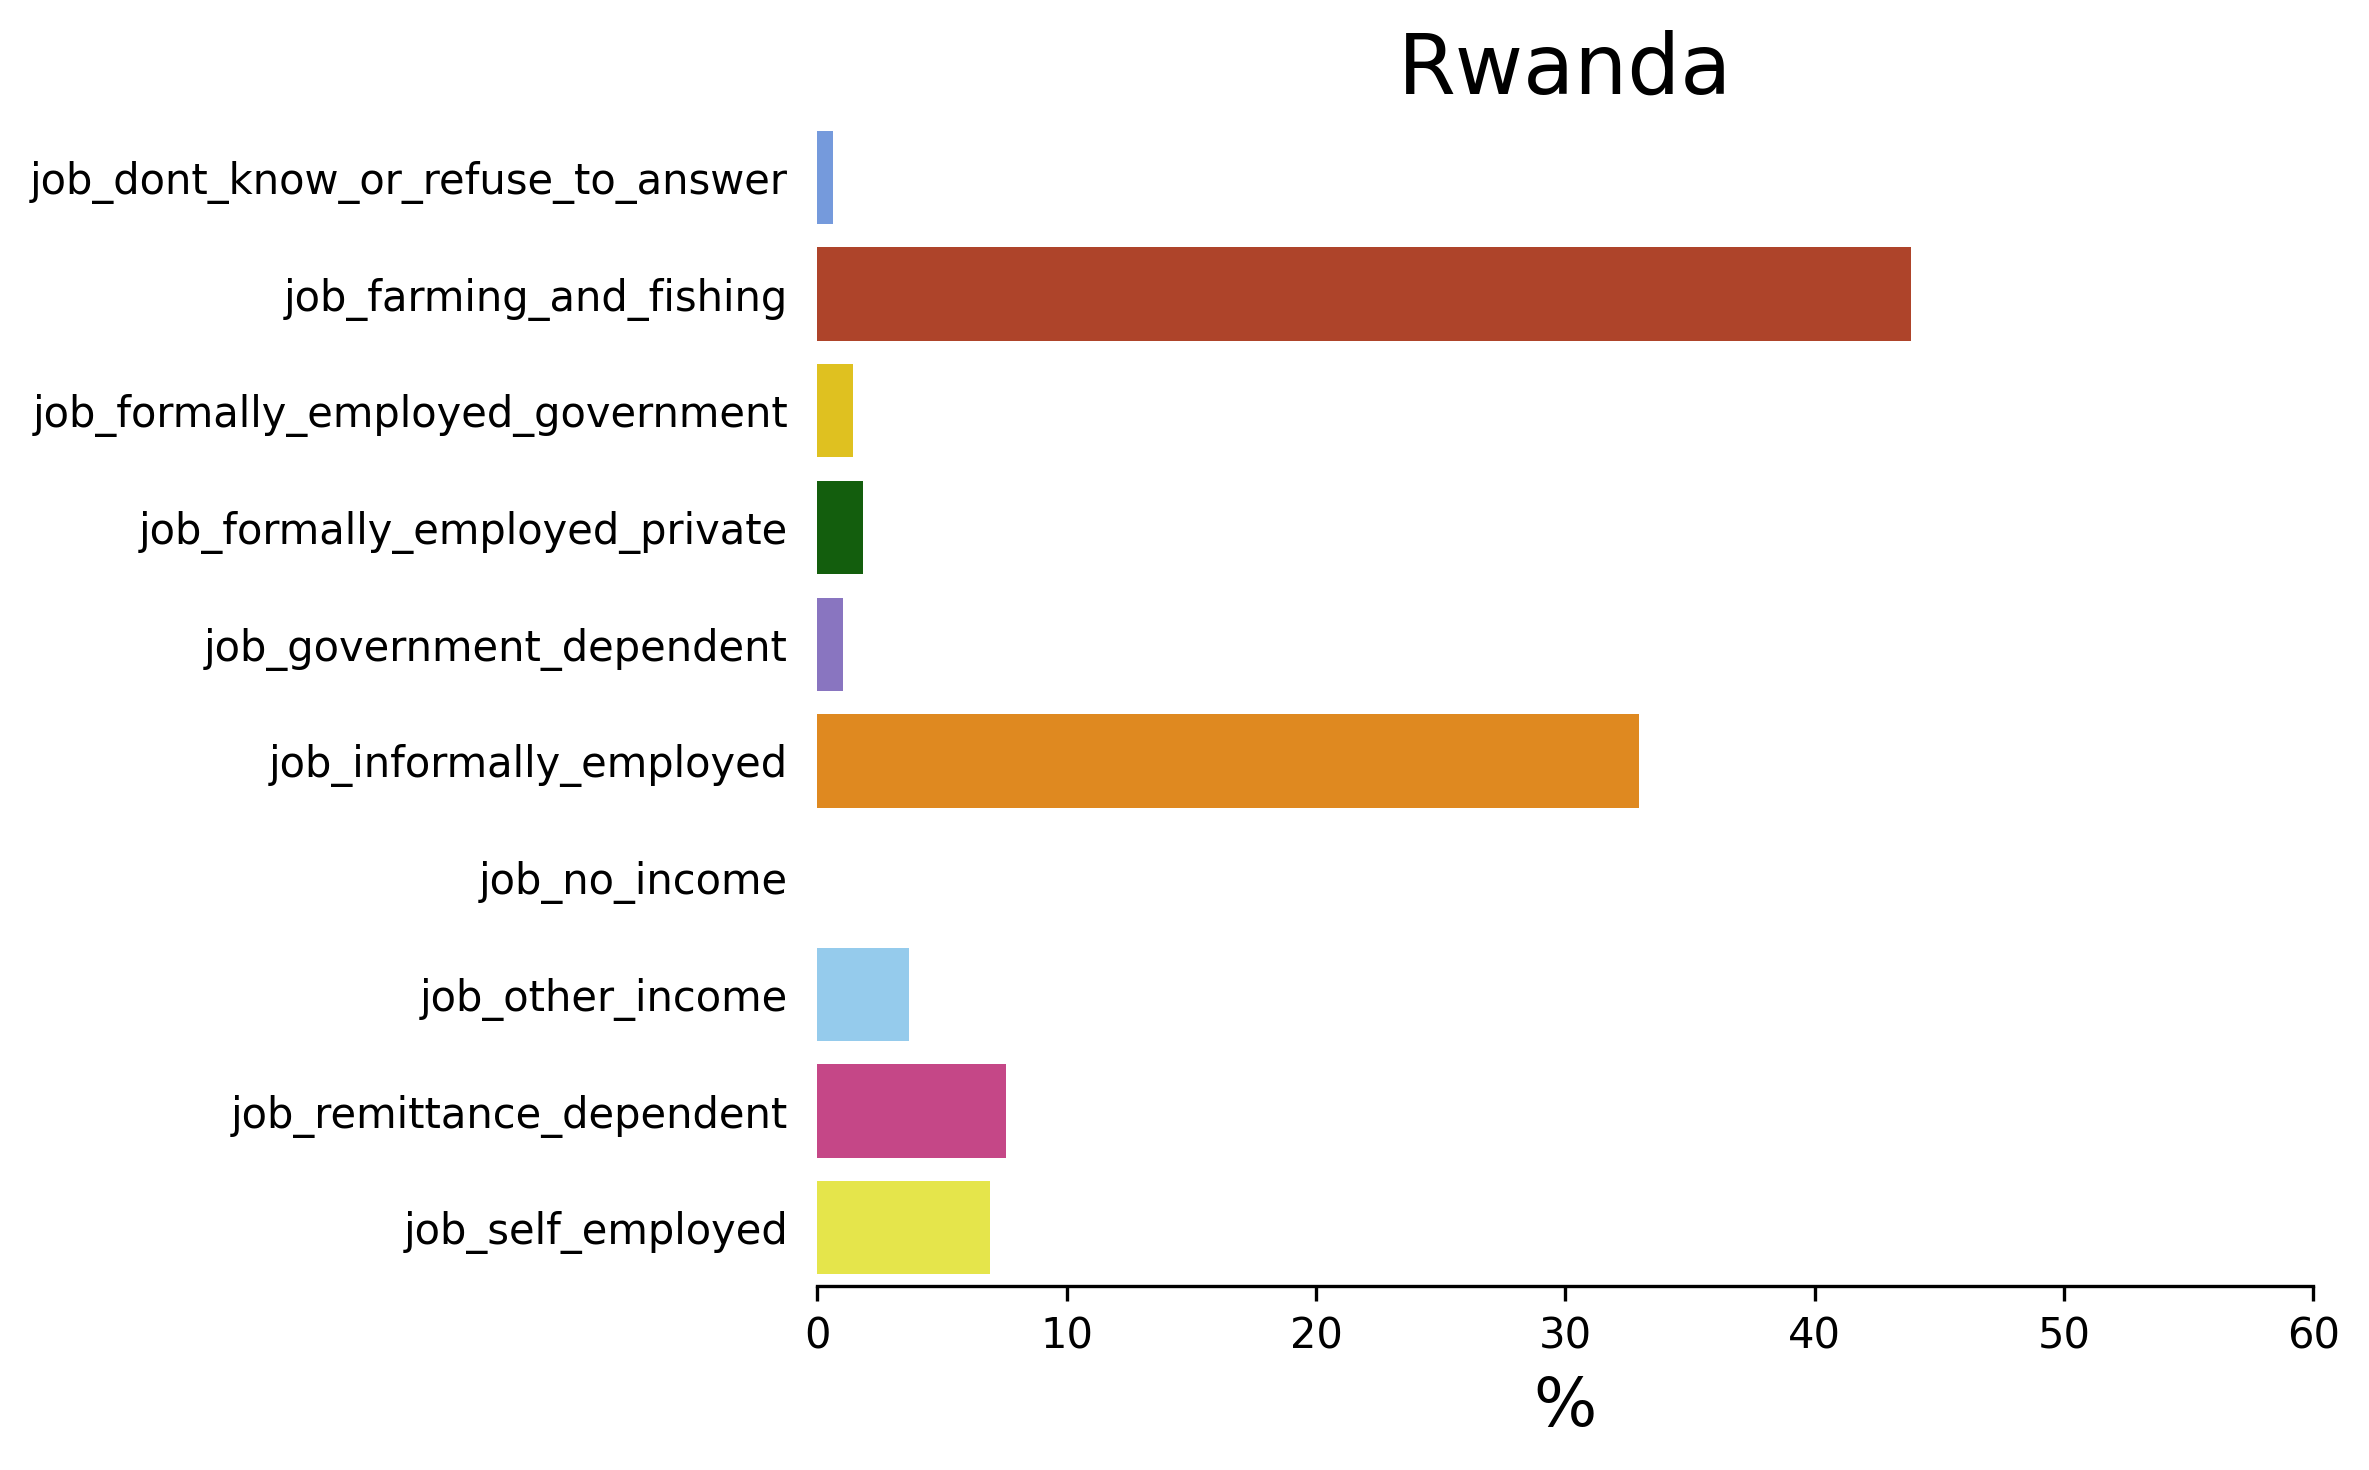

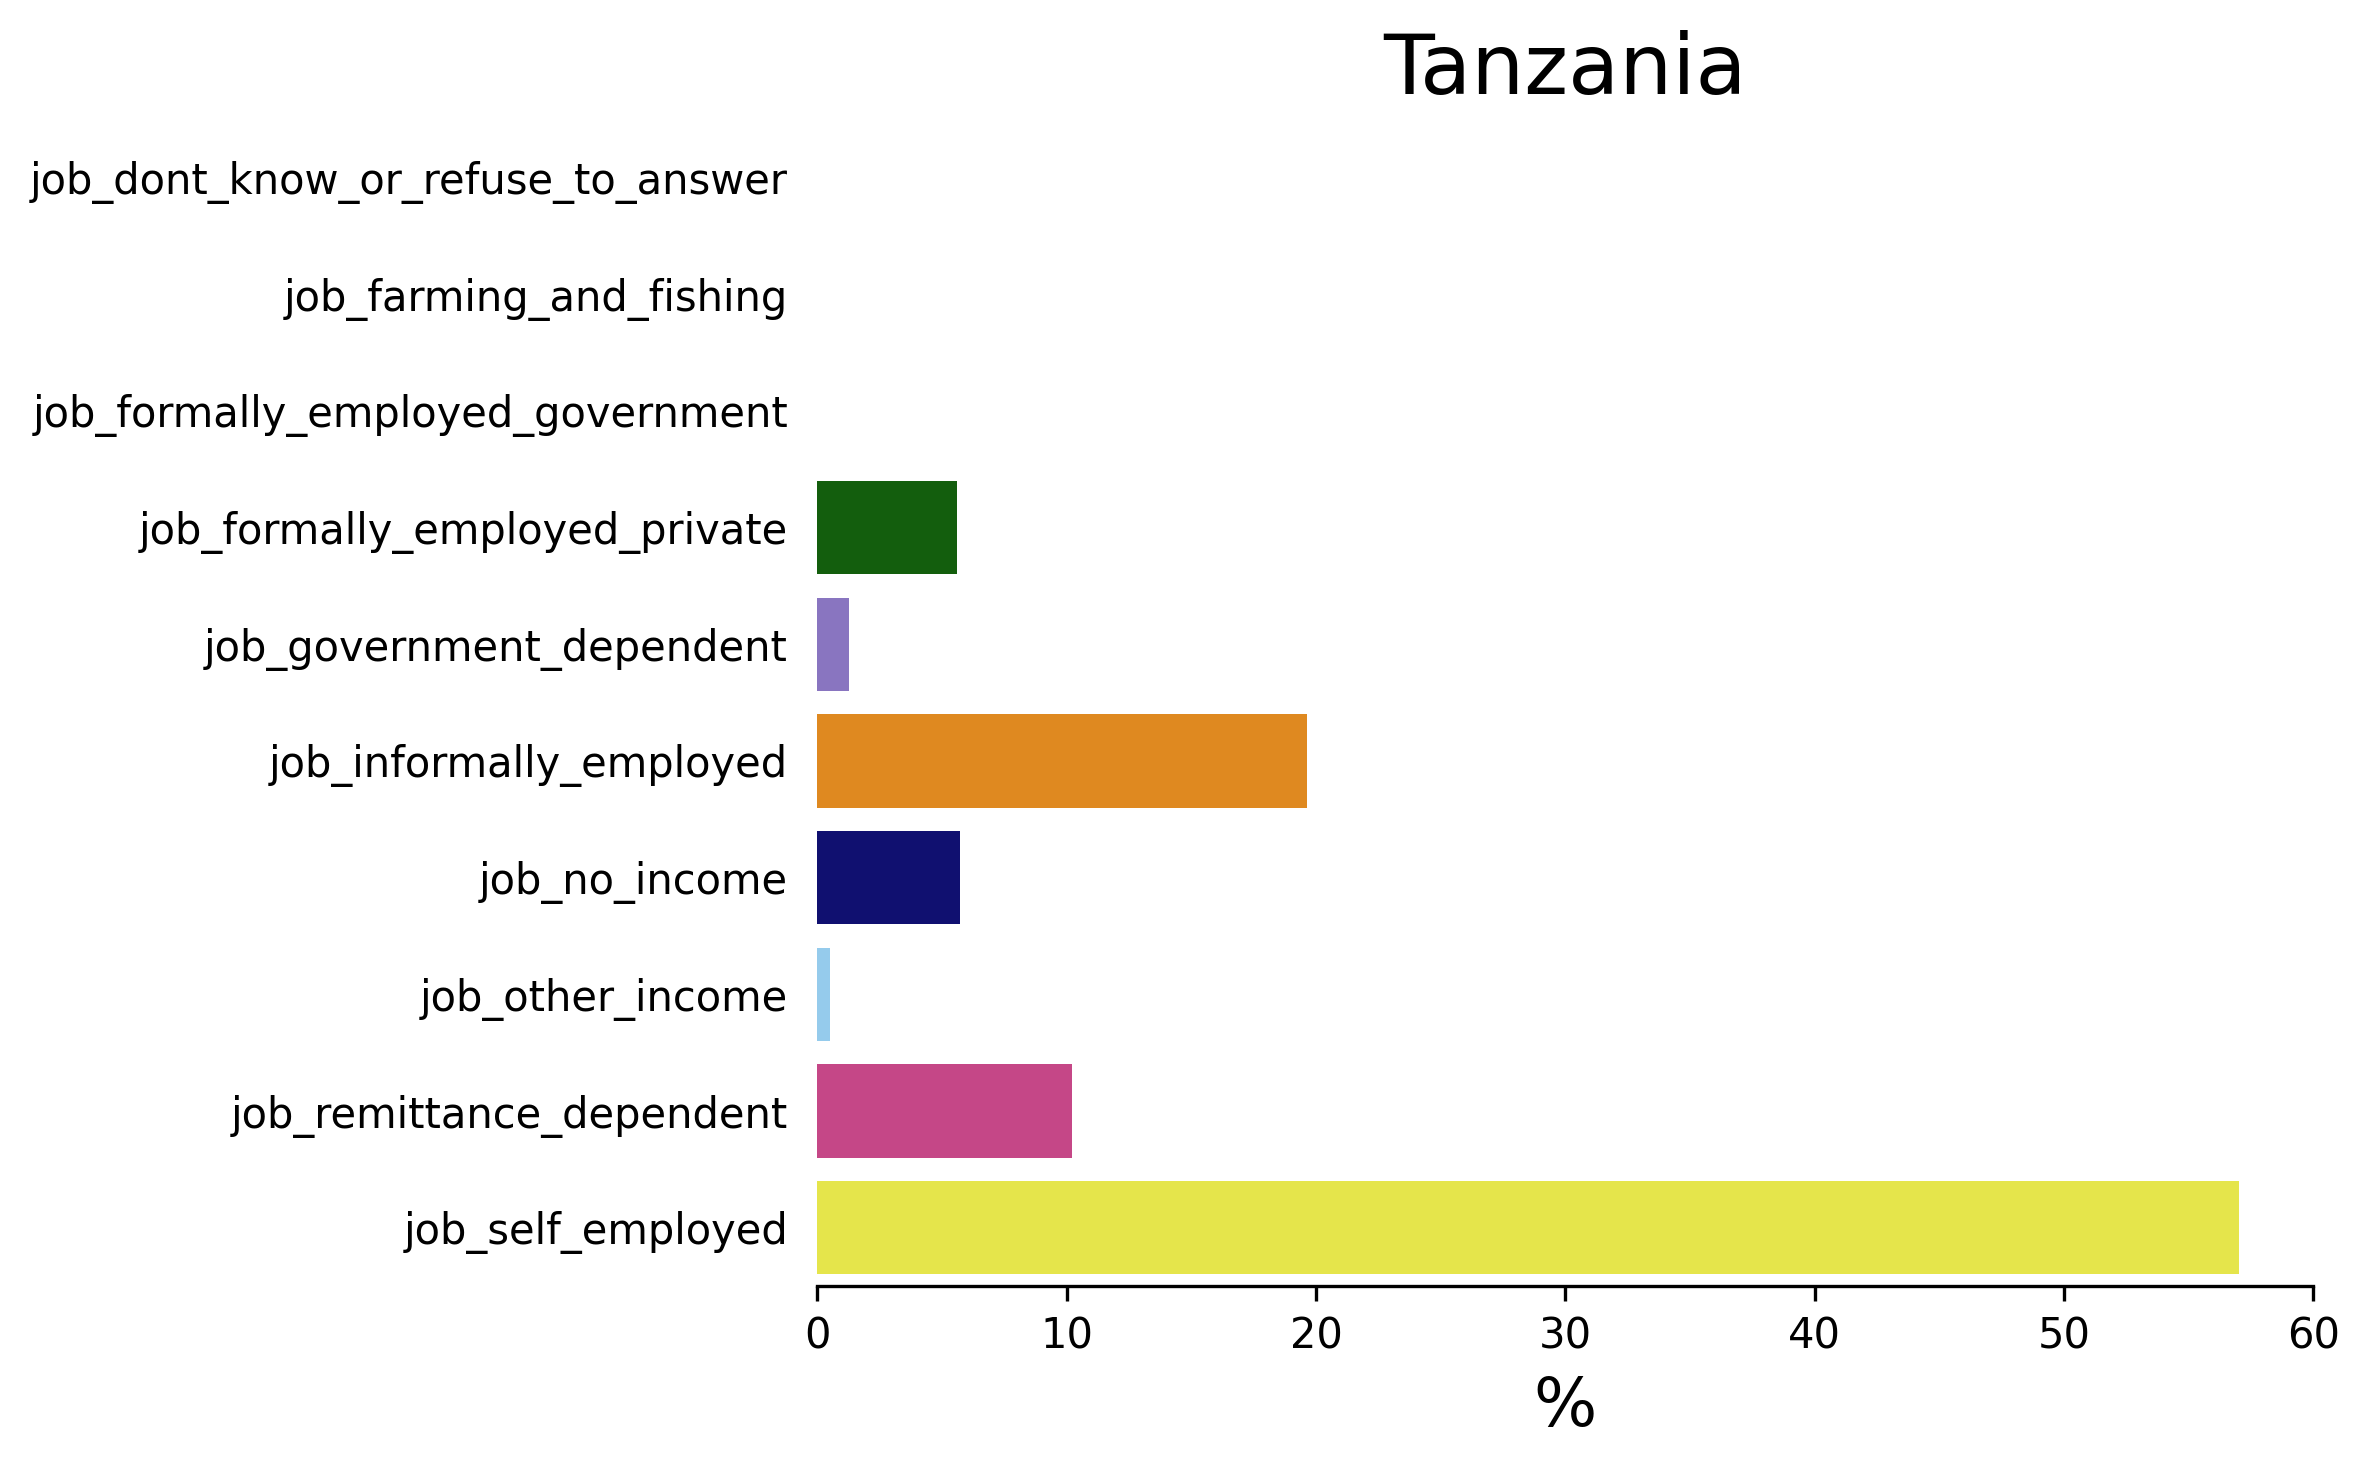

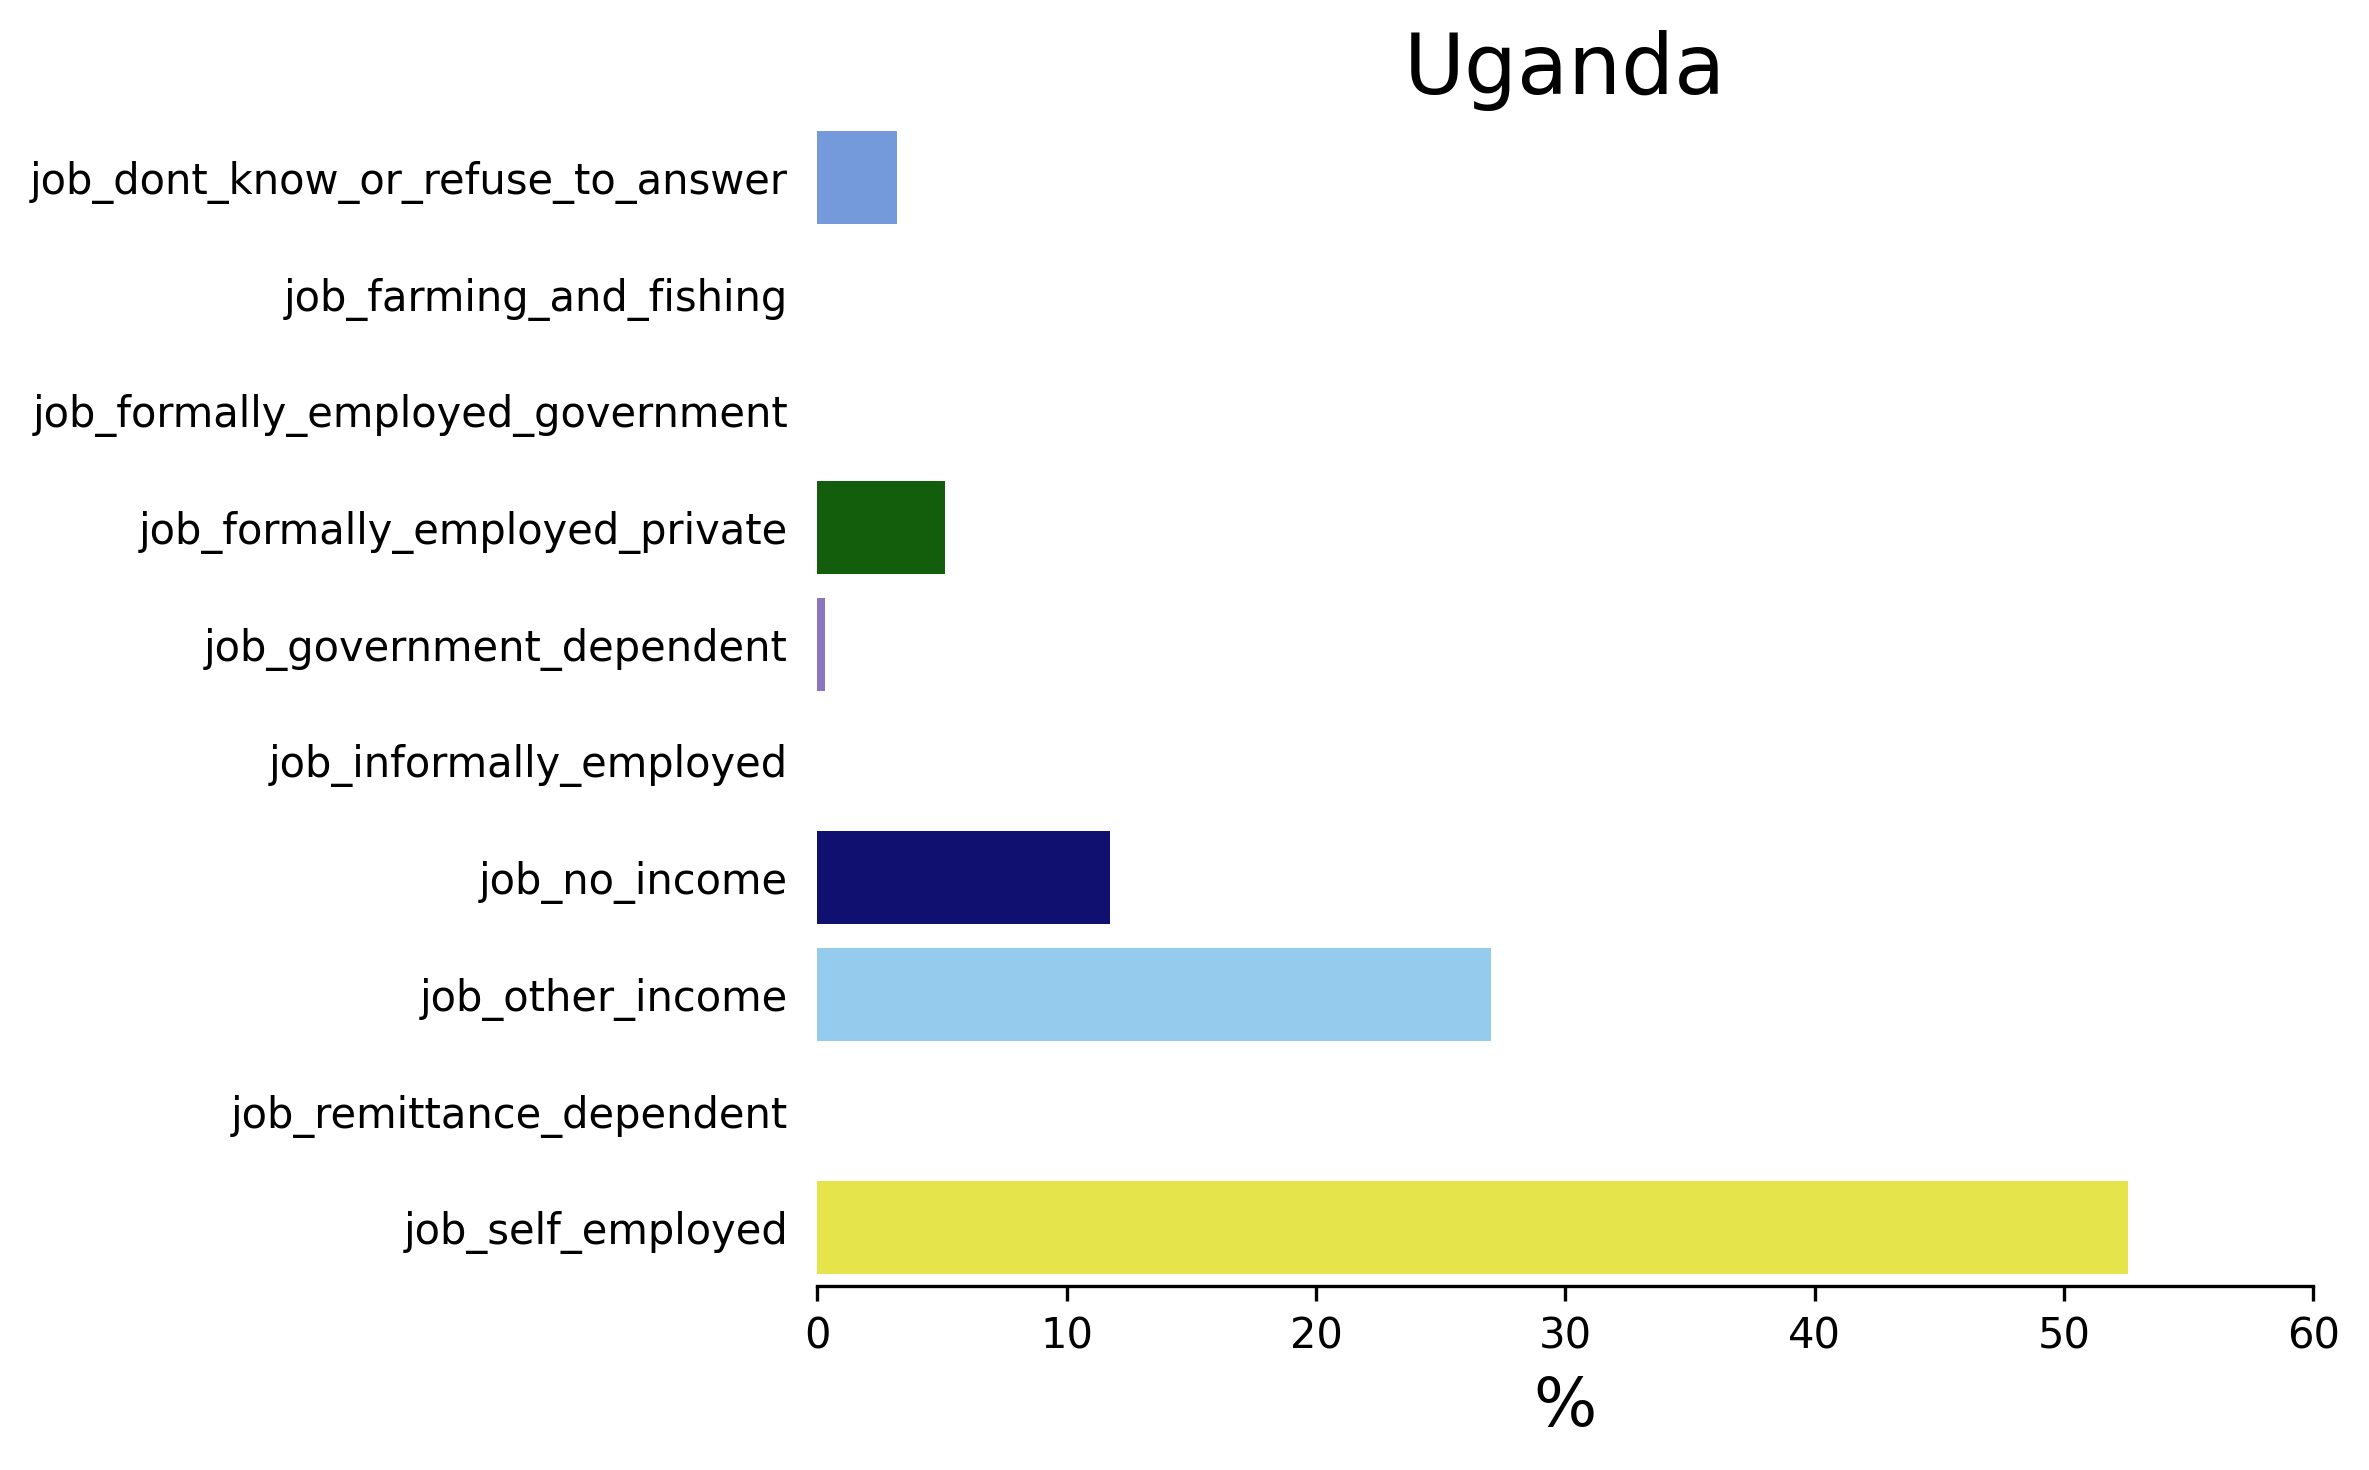

In [46]:
for countr in country_list:
        fig = plt.figure(figsize=(8,5), dpi= 300)
        g=sns.barplot(y = job_sum.index, 
                x = (job_sum[countr] / job_sum[countr].sum())*100,
                palette= plot_colors
                )
        g.set_title(countr, fontsize = 20)
        g.set_xlabel('%', fontsize = 16)
        g.set_ylabel('', fontsize = 16)
        g.set_xlim(0,60)
        sns.despine(left = True)
        g.tick_params(left = False)
        picname = '../plots_and_pictures/bar_job_type_' + countr + '.png'
        plt.tight_layout()
        plt.savefig(picname, transparent=False, dpi=fig.dpi)
        plt.show();

In [47]:
job_join = pd.concat([df.groupby('job_type').job_type.count(),
                            df.query('bank_account == "Yes"').groupby('job_type').job_type.count()],
                            axis=1)
job_join.fillna(0, inplace=True)
job_join

,job_type,job_type
job_type,,
Dont Know/Refuse to answer,126,14
Farming and Fishing,5441,635
Formally employed Government,387,300
Formally employed Private,1055,571
Government Dependent,247,50
Informally employed,5597,445
No Income,627,13
Other Income,1080,196
Remittance Dependent,2527,240


In [48]:
job_join['account_rate'] = (job_join.iloc[:,1]/job_join.iloc[:,0])*100
job_join

,job_type,job_type,account_rate
job_type,,,
Dont Know/Refuse to answer,126,14,11.111111
Farming and Fishing,5441,635,11.670649
Formally employed Government,387,300,77.519380
Formally employed Private,1055,571,54.123223
Government Dependent,247,50,20.242915
Informally employed,5597,445,7.950688
No Income,627,13,2.073365
Other Income,1080,196,18.148148
Remittance Dependent,2527,240,9.497428


In [49]:
# fig = plt.figure(figsize=(10, 8), dpi=120)
# g=sns.barplot(y = job_join.index,
#             x = job_join.account_rate)
# g.set_xticklabels(g.get_xticklabels(), rotation = 90)

# plt.savefig('plots_and_pictures/jobtype_bank_rate', transparent=True, dpi=fig.dpi)

/var/folders/0r/sbr_hnhj2j39nld23c8vxg9w0000gn/T/ipykernel_94414/1977376249.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=16)
/var/folders/0r/sbr_hnhj2j39nld23c8vxg9w0000gn/T/ipykernel_94414/1977376249.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=16)


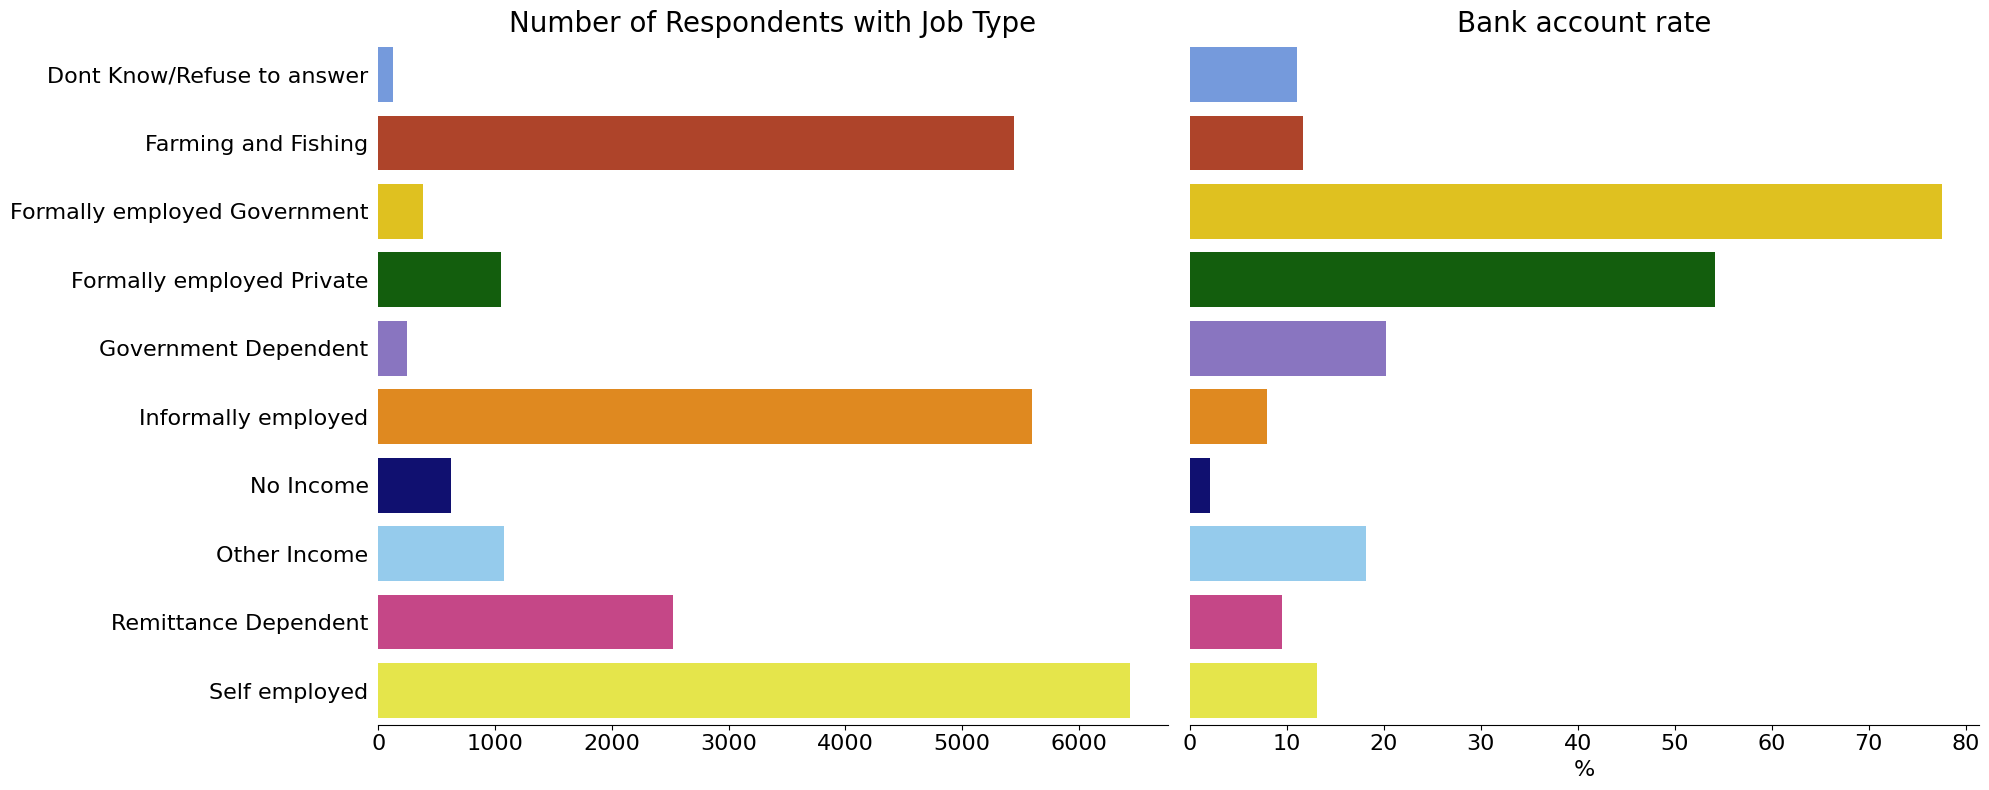

In [51]:
fig,ax = plt.subplots(1,2, sharey=True,figsize=(20,8))
#cmap = matplotlib.colors.ListedColormap(plot_colors)
ax1 =sns.barplot(y = job_join.index,
            x = job_join.iloc[:,0],
            ax=ax[0]
            )
ax1.set_title('Number of Respondents with Job Type', fontsize=20)
ax1.set(xlabel = '',
              ylabel = '' )
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=16)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=16)
ax1.tick_params(left = False)
ax2 =sns.barplot(y = job_join.index,
            x = job_join.account_rate,
            ax=ax[1]
            )
#ax2.set_xticklabels(g.get_xticklabels(), rotation = 0)
ax2.set_title('Bank account rate',fontsize=20)
ax2.set_xlabel('%', fontsize = 16)
ax2.set_ylabel('', fontsize = 16)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=16)

fig.subplots_adjust(wspace=0, hspace=0)
ax2.tick_params(left = False)
sns.despine(left = True)
plt.tight_layout()
plt.savefig('../plots_and_pictures/job_bank_account_rate.png', transparent=False, dpi=fig.dpi)
plt.show()


## Location Type

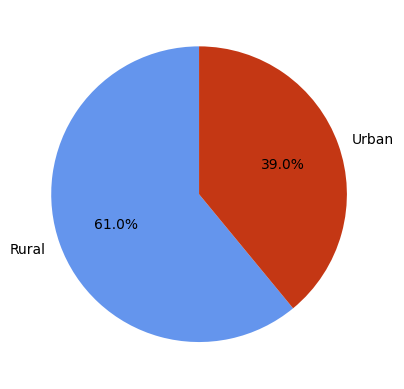

In [52]:
plt.pie(df.location_type.value_counts(normalize=True),
                labels = ['Rural', 'Urban'],
                autopct='%1.1f%%',
                startangle= 90,
                radius = 1.)
plt.show()

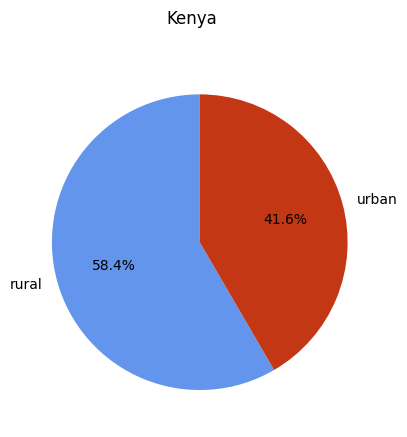

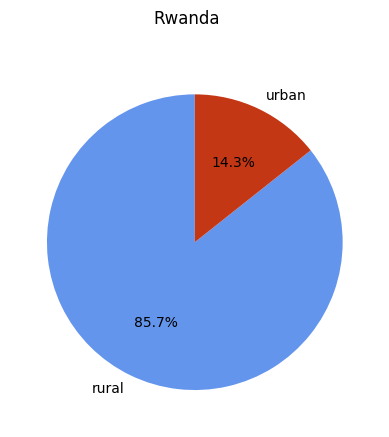

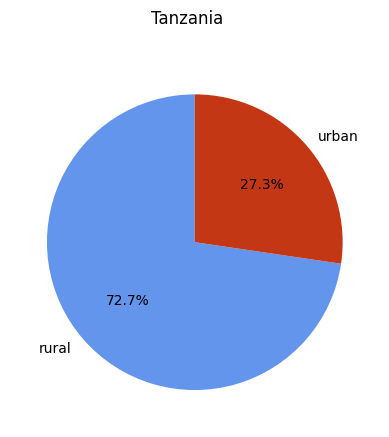

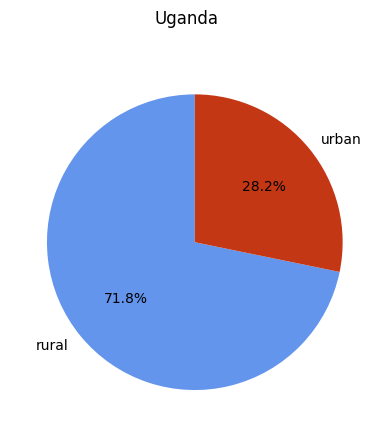

In [54]:
colors = sns.color_palette('tab10')
for countr in country_list:
        plt.pie(df.query('country == @countr').location_type.value_counts(normalize=True),
                labels = ['rural', 'urban'],
                autopct='%1.1f%%',
                startangle= 90,
                radius = 1.,
                #hatch=['O.O', '.||.']
                )
        plt.suptitle(countr)
        picname = '../plots_and_pictures/pie_bank_account_' + countr + '.png'
        plt.savefig(picname, transparent=True)
        #plt.savefig('filename.png', format='png', dpi='600', transparent=True)
        plt.show()

## Household Size

In [55]:
df.household_size.describe()

count    23524.000000
mean         3.797483
std          2.227613
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

In [56]:
#df.groupby('household_size').household_size.count()

In [57]:
#df.query('bank_account == "Yes"').groupby('household_size').household_size.count()

In [58]:
list(range(11,21))

[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [59]:
household_join = pd.concat([df.groupby('household_size').household_size.count(),
                            df.query('bank_account == "Yes"').groupby('household_size').household_size.count()],
                            axis=1)
household_join.fillna(0, inplace=True)
household_join

,household_size,household_size
household_size,,
1,3057,584.0
2,5229,619.0
3,3920,559.0
4,3474,501.0
5,2853,427.0
6,2096,277.0
7,1400,177.0
8,751,86.0
9,363,37.0


In [60]:
#household_join.loc[11:21].sum()

In [61]:
household_join.drop(index=[11, 12, 13, 14, 15, 16, 17, 18, 20, 21], axis=0, inplace=True)
#household_join.loc[11:21].sum()[0]

household_join

,household_size,household_size
household_size,,
1,3057,584.0
2,5229,619.0
3,3920,559.0
4,3474,501.0
5,2853,427.0
6,2096,277.0
7,1400,177.0
8,751,86.0
9,363,37.0


In [62]:
household_join['account_rate'] = (household_join.iloc[:,1]/household_join.iloc[:,0])*100
household_join

,household_size,household_size,account_rate
household_size,,,
1,3057,584.0,19.103696
2,5229,619.0,11.837828
3,3920,559.0,14.260204
4,3474,501.0,14.421416
5,2853,427.0,14.966702
6,2096,277.0,13.215649
7,1400,177.0,12.642857
8,751,86.0,11.451398
9,363,37.0,10.192837


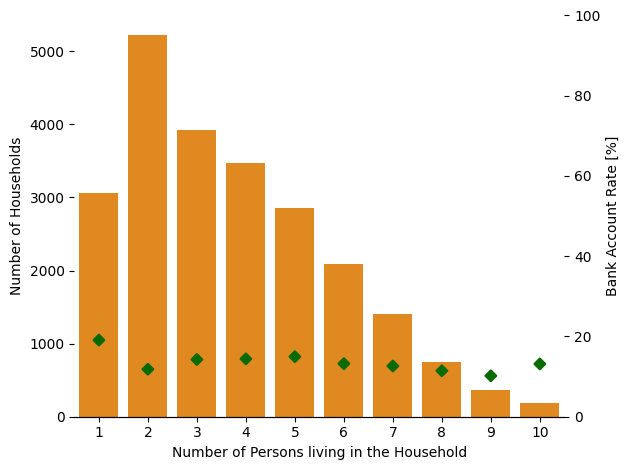

In [64]:
ax1 = sns.barplot(data = household_join,
             x = household_join.index,
             y = household_join.iloc[:,0],
             color='darkorange'
             )
ax1.set_xlabel('Number of Persons living in the Household')
ax1.set_ylabel('Number of Households')
ax2 = ax1.twinx()
sns.pointplot(data = household_join,
             x = household_join.index,
             y = 'account_rate',
             markers='D',
             scale= 0.8,
             linestyles= '',
             color='#076B00'
             )
ax2.set_ylabel('Bank Account Rate [%]')
ax2.set_ylim(0, 100)
#ax2.tick_params(left = False)
sns.despine(left = True)
plt.tight_layout()
plt.savefig('../plots_and_pictures/household_barplot', transparent=False, dpi=fig.dpi)

The same now for Age of respondent

In [65]:
df.age_of_respondent.describe()

count    23524.000000
mean        38.805220
std         16.520569
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: age_of_respondent, dtype: float64

In [66]:
age_join = pd.concat([df.groupby('age_of_respondent').age_of_respondent.count(),
                            df.query('bank_account == "Yes"').groupby('age_of_respondent').age_of_respondent.count()],
                            axis=1)
age_join.fillna(0, inplace=True)
age_join

,age_of_respondent,age_of_respondent
age_of_respondent,,
16,462,5.0
17,477,10.0
18,585,21.0
19,470,28.0
20,626,36.0
...,...,...
96,3,0.0
97,1,0.0
98,6,0.0


In [67]:
age_join['account_rate'] = (age_join.iloc[:,1]/age_join.iloc[:,0])*100
age_join

,age_of_respondent,age_of_respondent,account_rate
age_of_respondent,,,
16,462,5.0,1.082251
17,477,10.0,2.096436
18,585,21.0,3.589744
19,470,28.0,5.957447
20,626,36.0,5.750799
...,...,...,...
96,3,0.0,0.000000
97,1,0.0,0.000000
98,6,0.0,0.000000


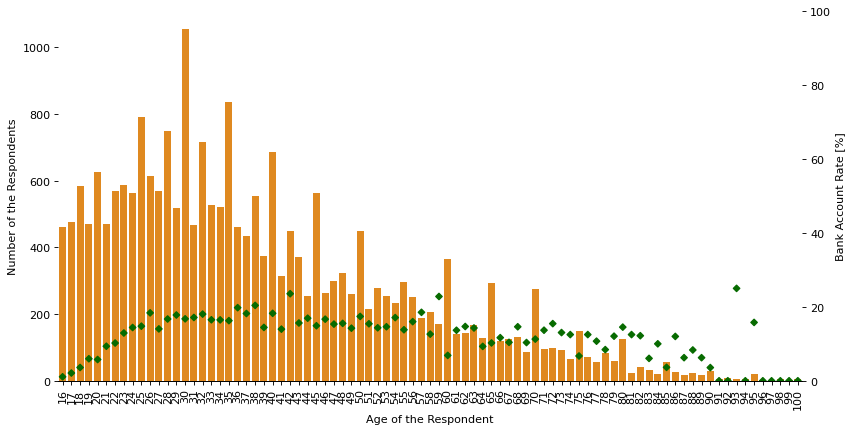

In [68]:
##import matplotlib.ticker as ticker

fig = plt.figure(figsize=(12, 6), dpi=80)
ax1 = sns.barplot(data = age_join,
             x = age_join.index,
             y = age_join.iloc[:,0],
             color='darkorange')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
ax1.set_ylabel('Number of the Respondents')
ax1.set_xlabel('Age of the Respondent')
ax2 = ax1.twinx()
sns.pointplot(data = age_join,
             x = age_join.index,
             y = 'account_rate',
             markers= 'D',
             scale= 0.6,
             linestyles= '',
             color='#076B00')
ax2.set_ylabel('Bank Account Rate [%]')
ax2.set_ylim(0, 100)
sns.despine(left=True)


I want to have age classes:  
(pd cut with bins didn't work, so I will make it by myself...)

In [69]:
age_join['age_class'] = (age_join.index -1) // 5
age_join

,age_of_respondent,age_of_respondent,account_rate,age_class
age_of_respondent,,,,
16,462,5.0,1.082251,3
17,477,10.0,2.096436,3
18,585,21.0,3.589744,3
19,470,28.0,5.957447,3
20,626,36.0,5.750799,3
...,...,...,...,...
96,3,0.0,0.000000,19
97,1,0.0,0.000000,19
98,6,0.0,0.000000,19


In [70]:
age_classes = age_join.groupby('age_class').sum()
age_classes

,age_of_respondent,age_of_respondent,account_rate
age_class,,,
3,2620,100.0,18.476676
4,2981,376.0,61.663802
5,3506,587.0,83.676636
6,3067,518.0,84.424156
7,2507,462.0,91.069163
8,1954,335.0,84.979984
9,1594,255.0,79.169434
10,1277,191.0,75.280715
11,1180,165.0,76.815027


account_rate is now wrong! Overwrite it:

In [71]:
age_classes['account_rate'] = (age_classes.iloc[:,1]/age_classes.iloc[:,0])*100
age_classes

,age_of_respondent,age_of_respondent,account_rate
age_class,,,
3,2620,100.0,3.816794
4,2981,376.0,12.613217
5,3506,587.0,16.742727
6,3067,518.0,16.889469
7,2507,462.0,18.428400
8,1954,335.0,17.144319
9,1594,255.0,15.997491
10,1277,191.0,14.956930
11,1180,165.0,13.983051


class names as str

In [72]:
age_classes['class_name'] = (((age_classes.index + 1)*5) - 4).astype(str) + '-' + ((age_classes.index + 1)*5).astype(str)
age_classes

,age_of_respondent,age_of_respondent,account_rate,class_name
age_class,,,,
3,2620,100.0,3.816794,16-20
4,2981,376.0,12.613217,21-25
5,3506,587.0,16.742727,26-30
6,3067,518.0,16.889469,31-35
7,2507,462.0,18.428400,36-40
8,1954,335.0,17.144319,41-45
9,1594,255.0,15.997491,46-50
10,1277,191.0,14.956930,51-55
11,1180,165.0,13.983051,56-60


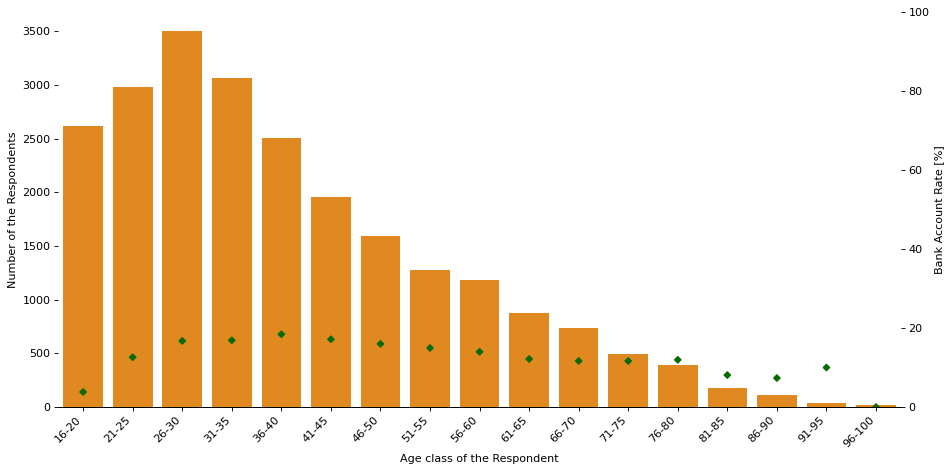

In [74]:
fig = plt.figure(figsize=(12, 6), dpi=80)
ax1 = sns.barplot(data = age_classes,
             x = age_classes.class_name,
             y = age_classes.iloc[:,0],
             color='darkorange')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, horizontalalignment='right')

ax1.set_ylabel('Number of the Respondents')
ax1.set_xlabel('Age class of the Respondent')
ax2 = ax1.twinx()
sns.pointplot(data = age_classes,
             x = age_classes.class_name,
             y = 'account_rate',
             markers= 'D',
             scale= 0.6,
             linestyles= '',
             color='#076B00')
ax2.set_ylabel('Bank Account Rate [%]')
ax2.set_ylim(0, 100)
sns.despine(left = True)
plt.tight_layout()
plt.savefig('../plots_and_pictures/age_barplot', transparent=False, dpi=fig.dpi)


## Cellphone Access

Matrix with bank account and cellphone access

In [75]:
phone_yes = pd.Series(df.query('cellphone_access == "Yes"').bank_account.value_counts(normalize=False), name='Phone_Yes')

In [76]:
phone_no = pd.Series(df.query('cellphone_access == "No"').bank_account.value_counts(normalize=False), name='Phone_No')

In [77]:
phone_yes, phone_no

(bank_account
 No     14246
 Yes     3208
 Name: Phone_Yes, dtype: int64,
 bank_account
 No     5966
 Yes     104
 Name: Phone_No, dtype: int64)

In [78]:
phone_matrix = pd.concat([phone_yes, phone_no], axis = 1)
phone_matrix.sort_index(axis = 0, ascending= False, inplace= True)
phone_matrix

,Phone_Yes,Phone_No
bank_account,,
Yes,3208,104
No,14246,5966


testing if I take all entries and double nothing:

In [79]:
phone_matrix.sum()[0] + phone_matrix.sum()[1]

23524

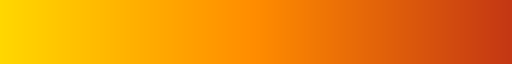

In [80]:

my_fringe =  LinearSegmentedColormap.from_list("", ['gold', 'darkorange', '#C43714'], N=256, gamma=1.0)
my_fringe

<Axes: ylabel='bank_account'>

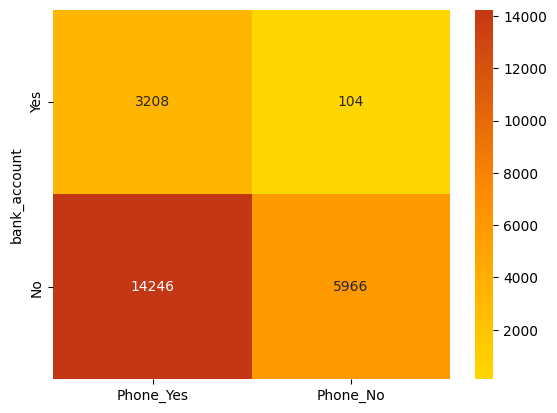

In [81]:
sns.heatmap(phone_matrix, annot= True, fmt=".0f", cmap= my_fringe)

# plt.savefig('plots_and_pictures/cellphone_heatmap', transparent=False, dpi=fig.dpi)

In [82]:
phone_matrix_perc = (phone_matrix / (phone_matrix.sum()[0] + phone_matrix.sum()[1])) * 100
phone_matrix_perc

,Phone_Yes,Phone_No
bank_account,,
Yes,13.637137,0.442102
No,60.559429,25.361333


In [83]:
phone_matrix_perc.sum()[0] + phone_matrix_perc.sum()[1]

100.0

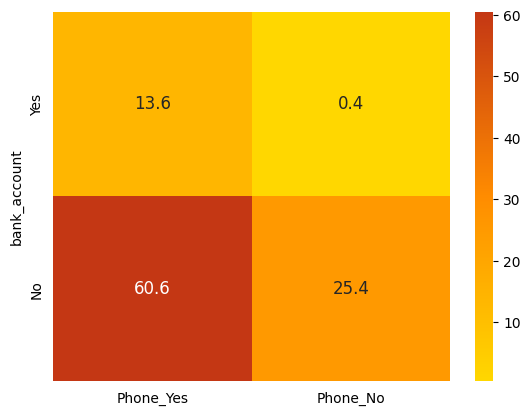

In [85]:
h = sns.heatmap(phone_matrix_perc,annot= True, fmt=".1f", cmap= my_fringe, annot_kws={"size": 12})
h.tick_params(left = False, bottom = False)

plt.savefig('../plots_and_pictures/cellphone_heatmap', transparent=False, dpi=fig.dpi)

Relationship with Head and Marital Status

In [86]:
df.gender_of_respondent.value_counts()

gender_of_respondent
Female    13877
Male       9647
Name: count, dtype: int64

In [87]:
relation_female = pd.Series(df.query('gender_of_respondent == "Female"').relationship_with_head.value_counts(normalize=False), name='relation_female')
relation_female

relationship_with_head
Spouse                 6427
Head of Household      5184
Child                  1170
Parent                  614
Other relative          371
Other non-relatives     111
Name: relation_female, dtype: int64

In [88]:
relation_male = pd.Series(df.query('gender_of_respondent == "Male"').relationship_with_head.value_counts(normalize=False), name='relation_male')
relation_male

relationship_with_head
Head of Household      7647
Child                  1059
Parent                  472
Other relative          297
Spouse                   93
Other non-relatives      79
Name: relation_male, dtype: int64

In [89]:
relation_matrix = pd.concat([relation_female, relation_male], axis = 1)
relation_matrix

,relation_female,relation_male
relationship_with_head,,
Spouse,6427,93
Head of Household,5184,7647
Child,1170,1059
Parent,614,472
Other relative,371,297
Other non-relatives,111,79


<Axes: ylabel='relationship_with_head'>

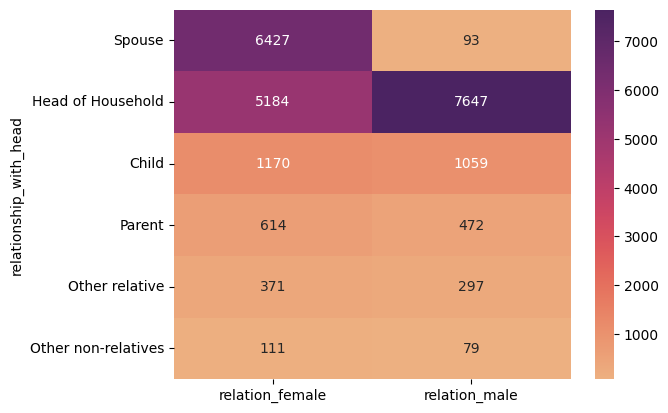

In [90]:
sns.heatmap(relation_matrix, annot= True, fmt=".0f", cmap="flare")

Noch einmal weiter aufteilen? Bank accoun yes/no pro female und male -> Gruppen sichtbar?

In [91]:
mar_stat_female = pd.Series(df.query('gender_of_respondent == "Female"').marital_status.value_counts(normalize=False), name='marital_status_female')
mar_stat_female

marital_status
Married/Living together    6017
Single/Never Married       4237
Widowed                    2413
Divorced/Seperated         1209
Dont know                     1
Name: marital_status_female, dtype: int64

In [92]:
mar_stat_male = pd.Series(df.query('gender_of_respondent == "Male"').marital_status.value_counts(normalize=False), name='marital_status_male')
mar_stat_male

marital_status
Married/Living together    4732
Single/Never Married       3746
Divorced/Seperated          867
Widowed                     295
Dont know                     7
Name: marital_status_male, dtype: int64

In [93]:
marital_matrix = pd.concat([mar_stat_female, mar_stat_male], axis = 1)
marital_matrix

,marital_status_female,marital_status_male
marital_status,,
Married/Living together,6017,4732
Single/Never Married,4237,3746
Widowed,2413,295
Divorced/Seperated,1209,867
Dont know,1,7


<Axes: ylabel='marital_status'>

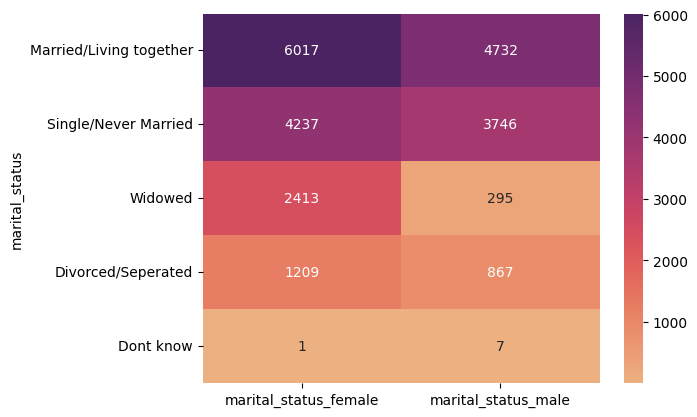

In [94]:
sns.heatmap(marital_matrix, annot= True, fmt=".0f", cmap="flare")